In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.io import fits
import numpy as np
from astropy.cosmology import FlatLambdaCDM as flcdm
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

In [2]:
def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)
hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodss_Huangall_candels_radec_van_sfr_8sfr.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodsn_Huangall_candels_radec_van_sfr_8sfr.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/egs_Huangall_candels_radec_van_sfr_8sfr.fits')[1].data
# Huang(2021) selected galaxies with 0.8<z<1.3
hdu1 = hdu1[np.where((hdu1['Separation_CANDELS_16']<1)&(hdu1['z_used']>=0.8)&(hdu1['z_used']<=1.3)&(hdu1['LMASS']>1)&(hdu1['re_f160w']>0)&(hdu1['SFR_8um']>0))]# &(hdu1['LIR_FULL']>0) &(hdu1['L8SFR']>0))] &(hdu1['LMASS']>1) &(hdu1['re_f160w']>0))] &(hdu1['LIR_FULL']>0)
hdu2 = hdu2[np.where((hdu2['Separation_CANDELS_16']<1)&(hdu2['z_used']>=0.8)&(hdu2['z_used']<=1.3)&(hdu2['LMASS']>1)&(hdu2['re_f160w']>0)&(hdu2['SFR_8um']>0))]#&(hdu2['LMASS']>1)&(hdu2['re_f160w']>0))]#&(hdu2['LIR_FULL']>0)#&(hdu2['L8SFR']>0)
hdu3 = hdu3[np.where((hdu3['Separation_CANDELS_16']<1)&(hdu3['z_used']>=0.8)&(hdu3['z_used']<=1.3)&(hdu3['ID']!=-1)&(hdu3['LMASS']>1)&(hdu3['re_f160w']>0)&(hdu3['SFR_8um']>0))]#&(hdu3['LMASS']>1)&(hdu3['re_f160w']>0))]#&(hdu3['LIR_FULL']>0)#&(hdu3['L8SFR']>0)
print('GOODSS: '+str(len(hdu1))+'\n'+'GOODSN: '+str(len(hdu2))+'\n'+'EGS: '+str(len(hdu3)))
print('all: '+str(len(hdu1)+len(hdu2)+len(hdu3)))
# hdu1_candels = fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/gds_all.fits')[1].data
hdu2_candels = fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/gdn_all.fits')[1].data
# hdu3_candels = fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/egs_all.fits')[1].data
# hdu = fits.open('/Users/lpr/Desktop/xuhai_barro.fits')[1].data
# hdu = hdu[np.where((hdu['re_f160w']>0)&(hdu['ssfr_uv_corr']<0))]
# for num4 in range(0,len(hdu)):
#     hdu[num4]['re_f160w'] = hdu[num4]['re_f160w']*kpc_per_arcsec(hdu[num4]['zbest_2'])
# hdu4 = fits.open('/Users/lpr/Desktop/xuhai_barro_xmm.fits')[1].data
# hdu4 = hdu4[np.where((hdu4['re_f160w']>0)&(hdu4['ssfr_uv_corr']<0))]
# for num5 in range(0,len(hdu4)):
#     hdu4[num5]['re_f160w'] = hdu4[num5]['re_f160w']*kpc_per_arcsec(hdu4[num5]['zbest_2'])

GOODSS: 101
GOODSN: 319
EGS: 33
all: 453


In [31]:
print(np.min(hdu1['LMASS']))
print(np.min(hdu2['LMASS']))
print(np.min(hdu3['LMASS']))

9.380211241711606
7.867926
9.69331


In [51]:
# hdu1 = hdu1[np.where(hdu1['z_used']<=1)]
# hdu2 = hdu2[np.where(hdu2['z_used']<=1)]
# hdu3 = hdu3[np.where(hdu3['z_used']<=1)]
hdu1 = hdu1[np.where(hdu1['z_used']>1)]
hdu2 = hdu2[np.where(hdu2['z_used']>1)]
hdu3 = hdu3[np.where(hdu3['z_used']>1)]

In [3]:
for num1 in range(0,len(hdu1)):
    hdu1[num1]['re_f160w'] = hdu1[num1]['re_f160w']*kpc_per_arcsec(hdu1[num1]['z_used'])
    hdu1[num1]['dre_f160w'] = hdu1[num1]['dre_f160w']*kpc_per_arcsec(hdu1[num1]['z_used'])
for num2 in range(0,len(hdu2)):
    hdu2[num2]['re_f160w'] = hdu2[num2]['re_f160w']*kpc_per_arcsec(hdu2[num2]['z_used'])
    hdu2[num2]['dre_f160w'] = hdu2[num2]['dre_f160w']*kpc_per_arcsec(hdu2[num2]['z_used'])
for num3 in range(0,len(hdu3)):
    hdu3[num3]['re_f160w'] = hdu3[num3]['re_f160w']*kpc_per_arcsec(hdu3[num3]['z_used'])
    hdu3[num3]['dre_f160w'] = hdu3[num3]['dre_f160w']*kpc_per_arcsec(hdu3[num3]['z_used'])

In [2]:
morph_hdu1=fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodss_Huangall_morph.fits')[1].data
morph_hdu2=fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodsn_Huangall_morph.fits')[1].data
morph_hdu3=fits.open('/Users/lpr/Data/lirg_project/output/catalog/egs_Huangall_morph.fits')[1].data

In [151]:
hdu1 = hdu1[np.where(hdu1['z_used']>1)]
hdu2 = hdu2[np.where(hdu2['z_used']>1)]
hdu3 = hdu3[np.where(hdu3['z_used']>1)]
# hdu = hdu[np.where(hdu['z_best_2']>1)]
# hdu4 = hdu4[np.where(hdu4['z_best_2']>1)]
# hdu1 = hdu1[np.where(hdu1['z_used']<1)]
# hdu2 = hdu2[np.where(hdu2['z_used']<1)]
# hdu3 = hdu3[np.where(hdu3['z_used']<1)]
# hdu = hdu[np.where(hdu['z_best_2']<1)]
# hdu4 = hdu4[np.where(hdu4['z_best_2']<1)]
print('GOODSS: '+str(len(hdu1))+'\n'+'GOODSN: '+str(len(hdu2))+'\n'+'EGS: '+str(len(hdu3)))
print('all: '+str(len(hdu1)+len(hdu2)+len(hdu3)))

GOODSS: 65
GOODSN: 133
EGS: 27
all: 225


In [9]:
agn1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 1)]
agn2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 1)]
agn3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 1)]
agn_l4p5_1 = hdu1[np.where(hdu1['L4P5EX'] >= 10**9.5)]#/hdu1['E4P5EX']
agn_l4p5_2 = hdu2[np.where(hdu2['L4P5EX'] >= 10**9.5)]#/hdu2['E4P5EX']
agn_l4p5_3 = hdu3[np.where(hdu3['L4P5EX'] >= 10**9.5)]#/hdu3['E4P5EX']
com1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 2)]
com2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 2)]
com3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 2)]
sf1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 3)]
sf2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 3)]
sf3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 3)]

In [32]:
morph_agn1 = np.full(len(agn1),-99)
for num in range(0,len(agn1)):
    idx = agn1[num]['ID']
    morph_agn1[num] = morph_hdu1[np.where(morph_hdu1['ID']==idx)]['morph']
morph_agn2 = np.full(len(agn2),-99)
for num in range(0,len(agn2)):
    idx = agn2[num]['ID']
    morph_agn2[num] = morph_hdu2[np.where(morph_hdu2['ID']==idx)]['morph']
morph_agn3 = np.full(len(agn3),-99)
for num in range(0,len(agn3)):
    idx = agn3[num]['ID']
    morph_agn3[num] = morph_hdu3[np.where(morph_hdu3['ID']==idx)]['morph']
morph_com1 = np.full(len(com1),-99)
for num in range(0,len(agn1)):
    idx = com1[num]['ID']
    morph_com1[num] = morph_hdu1[np.where(morph_hdu1['ID']==idx)]['morph']
morph_com2 = np.full(len(com2),-99)
for num in range(0,len(agn2)):
    idx = com2[num]['ID']
    morph_com2[num] = morph_hdu2[np.where(morph_hdu2['ID']==idx)]['morph']
morph_com3 = np.full(len(com3),-99)
for num in range(0,len(com3)):
    idx = com3[num]['ID']
    morph_com3[num] = morph_hdu3[np.where(morph_hdu3['ID']==idx)]['morph']
morph_sf1 = np.full(len(sf1),-99)
for num in range(0,len(sf1)):
    idx = sf1[num]['ID']
    morph_sf1[num] = morph_hdu1[np.where(morph_hdu1['ID']==idx)]['morph']
morph_sf2 = np.full(len(sf2),-99)
for num in range(0,len(sf2)):
    idx = sf2[num]['ID']
    morph_sf2[num] = morph_hdu2[np.where(morph_hdu2['ID']==idx)]['morph']
morph_sf3 = np.full(len(sf3),-99)
for num in range(0,len(sf3)):
    idx = sf3[num]['ID']
    morph_sf3[num] = morph_hdu3[np.where(morph_hdu3['ID']==idx)]['morph']

In [13]:
# agn_morph = np.concatenate((morph_agn1,morph_agn2,morph_agn3),axis=0)
# com_morph = np.concatenate((morph_com1,morph_com2,morph_com3),axis=0)
# sf_morph = np.concatenate((morph_sf1,morph_sf2,morph_sf3),axis=0)
# --------------------------------------------------------------------------------------------------------------------------
agn_mass = np.concatenate((agn1['LMASS'],agn2['LMASS'],agn3['LMASS']),axis=0)
agn_masserr = np.concatenate((agn1['LMASS_ERR'],agn2['LMASS_ERR'],agn3['LMASS_ERR']),axis=0)
agn_re = np.concatenate((agn1['re_f160w'],agn2['re_f160w'],agn3['re_f160w']),axis=0)
agn_reerr = np.concatenate((agn1['dre_f160w'],agn2['dre_f160w'],agn3['dre_f160w']),axis=0)
agn_n = np.concatenate((agn1['n_f160w'],agn2['n_f160w'],agn3['n_f160w']),axis=0)
agn_sfr = np.concatenate((agn1['SFR_8umsfr'],agn2['SFR_8umsfr'],agn3['SFR_8umsfr']),axis=0) # sfr come from 8um luminosity
agn_sfrerr = np.concatenate((agn1['SFR_8umsfr_err'],agn2['SFR_8umsfr_err'],agn3['SFR_8umsfr_err']),axis=0)
agn_l4p5 = np.concatenate((agn1['L4P5EX'],agn2['L4P5EX'],agn3['L4P5EX']),axis=0)
agn_z = np.concatenate((agn1['z_used'],agn2['z_used'],agn3['z_used']),axis=0)
# agn_lir = np.concatenate((agn1['LIR_FULL'],agn2['LIR_FULL'],agn3['LIR_FULL']),axis=0)
# --------------------------------------------------------------------------------------------------------------------------
agn_l4p5_mass = np.concatenate((agn_l4p5_1['LMASS'],agn_l4p5_2['LMASS'],agn_l4p5_3['LMASS']),axis=0)
agn_l4p5_masserr = np.concatenate((agn_l4p5_1['LMASS_ERR'],agn_l4p5_2['LMASS_ERR'],agn_l4p5_3['LMASS_ERR']),axis=0)
agn_l4p5_re = np.concatenate((agn_l4p5_1['re_f160w'],agn_l4p5_2['re_f160w'],agn_l4p5_3['re_f160w']),axis=0)
agn_l4p5_reerr = np.concatenate((agn_l4p5_1['dre_f160w'],agn_l4p5_2['dre_f160w'],agn_l4p5_3['dre_f160w']),axis=0)
agn_l4p5_n = np.concatenate((agn_l4p5_1['n_f160w'],agn_l4p5_2['n_f160w'],agn_l4p5_3['n_f160w']),axis=0)
agn_l4p5_sfr = np.concatenate((agn_l4p5_1['SFR_8umsfr'],agn_l4p5_2['SFR_8umsfr'],agn_l4p5_3['SFR_8umsfr']),axis=0)
agn_l4p5_sfrerr = np.concatenate((agn_l4p5_1['SFR_8umsfr_err'],agn_l4p5_2['SFR_8umsfr_err'],agn_l4p5_3['SFR_8umsfr_err']),axis=0)
agn_l4p5_l4p5 = np.concatenate((agn_l4p5_1['L4P5EX'],agn_l4p5_2['L4P5EX'],agn_l4p5_3['L4P5EX']),axis=0)
agn_l4p5_z = np.concatenate((agn_l4p5_1['z_used'],agn_l4p5_2['z_used'],agn_l4p5_3['z_used']),axis=0)
# agn_l4p5_lir = np.concatenate((agn_l4p5_1['LIR_FULL'],agn_l4p5_2['LIR_FULL'],agn_l4p5_3['LIR_FULL']),axis=0)
# # --------------------------------------------------------------------------------------------------------------------------
com_mass = np.concatenate((com1['LMASS'],com2['LMASS'],com3['LMASS']),axis=0)
com_re = np.concatenate((com1['re_f160w'],com2['re_f160w'],com3['re_f160w']),axis=0)
com_n = np.concatenate((com1['n_f160w'],com2['n_f160w'],com3['n_f160w']),axis=0)
com_sfr = np.concatenate(((com1['SFR_8um']),(com2['SFR_8um']),(com3['SFR_8um'])),axis=0)
com_l4p5 = np.concatenate((com1['L4P5EX'],com2['L4P5EX'],com3['L4P5EX']),axis=0)
com_z = np.concatenate((com1['z_used'],com2['z_used'],com3['z_used']),axis=0)
# # com_lir = np.concatenate((com1['LIR_FULL'],com2['LIR_FULL'],com3['LIR_FULL']),axis=0)
# # --------------------------------------------------------------------------------------------------------------------------
sf_mass = np.concatenate((sf1['LMASS'],sf2['LMASS'],sf3['LMASS']),axis=0)
sf_re = np.concatenate((sf1['re_f160w'],sf2['re_f160w'],sf3['re_f160w']),axis=0)
sf_n = np.concatenate((sf1['n_f160w'],sf2['n_f160w'],sf3['n_f160w']),axis=0)
sf_sfr = np.concatenate(((sf1['SFR_8um']),(sf2['SFR_8um']),(sf3['SFR_8um'])),axis=0)
sf_l4p5 = np.concatenate((sf1['L4P5EX'],sf2['L4P5EX'],sf3['L4P5EX']),axis=0)
sf_z = np.concatenate((sf1['z_used'],sf2['z_used'],sf3['z_used']),axis=0)
# # sf_lir = np.concatenate((sf1['LIR_FULL'],sf2['LIR_FULL'],sf3['LIR_FULL']),axis=0)
# --------------------------------------------------------------------------------------------------------------------------
all_mass = np.concatenate((hdu1['LMASS'],hdu2['LMASS'],hdu3['LMASS']),axis=0)
all_masserr = np.concatenate((hdu1['LMASS_ERR'],hdu2['LMASS_ERR'],hdu3['LMASS_ERR']),axis=0)
all_re = np.concatenate((hdu1['re_f160w'],hdu2['re_f160w'],hdu3['re_f160w']),axis=0)
all_reerr = np.concatenate((hdu1['dre_f160w'],hdu2['dre_f160w'],hdu3['dre_f160w']),axis=0)
all_n = np.concatenate((hdu1['n_f160w'],hdu2['n_f160w'],hdu3['n_f160w']),axis=0)
all_sfr = np.concatenate((hdu1['SFR_8umsfr'],hdu2['SFR_8umsfr'],hdu3['SFR_8umsfr']),axis=0)
all_sfrerr = np.concatenate((hdu1['SFR_8umsfr_err'],hdu2['SFR_8umsfr_err'],hdu3['SFR_8umsfr_err']),axis=0)
all_l4p5 = np.concatenate((hdu1['L4P5EX'],hdu2['L4P5EX'],hdu3['L4P5EX']),axis=0)
# all_lir = np.concatenate((hdu1['LIR_FULL'],hdu2['LIR_FULL'],hdu3['LIR_FULL']),axis=0)

In [14]:
hdu1_xagn = hdu1[np.where(hdu1['LX']>42)]
hdu2_xagn = hdu2[np.where(hdu2['LX']>42)]
hdu3_xagn = hdu3[np.where(hdu3['LX']>42)]
xagn_mass = np.concatenate((hdu1_xagn['LMASS'],hdu2_xagn['LMASS'],hdu3_xagn['LMASS']),axis=0)
xagn_masserr = np.concatenate((hdu1_xagn['LMASS_ERR'],hdu2_xagn['LMASS_ERR'],hdu3_xagn['LMASS_ERR']),axis=0)
xagn_re = np.concatenate((hdu1_xagn['re_f160w'],hdu2_xagn['re_f160w'],hdu3_xagn['re_f160w']),axis=0)
xagn_reerr = np.concatenate((hdu1_xagn['dre_f160w'],hdu2_xagn['dre_f160w'],hdu3_xagn['dre_f160w']),axis=0)
xagn_n = np.concatenate((hdu1_xagn['n_f160w'],hdu2_xagn['n_f160w'],hdu3_xagn['n_f160w']),axis=0)
xagn_sfr = np.concatenate(((hdu1_xagn['SFR_8umsfr']),(hdu2_xagn['SFR_8umsfr']),(hdu3_xagn['SFR_8umsfr'])),axis=0) # sfr come from 8um luminosity
xagn_sfrerr = np.concatenate((hdu1_xagn['SFR_8umsfr_err'],hdu2_xagn['SFR_8umsfr_err'],hdu3_xagn['SFR_8umsfr_err']),axis=0)
# xagn_l4p5 = np.concatenate((hdu1_xagn['L4P5EX'],hdu2_xagn['L4P5EX'],hdu3_xagn['L4P5EX']),axis=0)
# xagn_lir = np.concatenate((hdu1_xagn['LIR_FULL'],hdu2_xagn['LIR_FULL'],hdu3_xagn['LIR_FULL']),axis=0)

(0.0, 15.0)

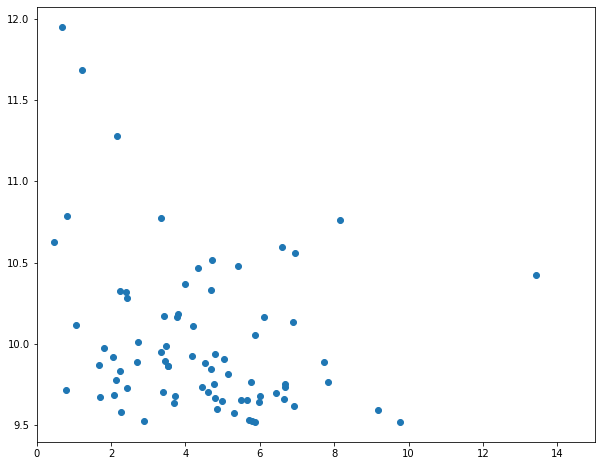

In [45]:
plt.figure(figsize=[10,8])
plt.scatter(agn_l4p5_re,np.log10(agn_l4p5_l4p5))
plt.xlim(0,15)

In [21]:
np.median(agn_l4p5_sfr)

43.91313171386719

In [43]:
print(hdu1[np.where((np.log10(10**hdu1['LMASS']/hdu1['re_f160w']**1.5)>10.4)&(np.log10((hdu1['SFR_8um']/10**hdu1['LMASS'])*1e9)>-2)&(np.log10((hdu1['SFR_8um']/10**hdu1['LMASS'])*1e9)<2))]['ID'])
print(hdu2[np.where((np.log10(10**hdu2['LMASS']/hdu2['re_f160w']**1.5)>10.4)&(np.log10((hdu2['SFR_8um']/10**hdu2['LMASS'])*1e9)>-2)&(np.log10((hdu2['SFR_8um']/10**hdu2['LMASS'])*1e9)<2))]['ID'])
print(hdu3[np.where((np.log10(10**hdu3['LMASS']/hdu3['re_f160w']**1.5)>10.4)&(np.log10((hdu3['SFR_8um']/10**hdu3['LMASS'])*1e9)>-2)&(np.log10((hdu3['SFR_8um']/10**hdu3['LMASS'])*1e9)<2))]['ID'])
# print('---------------------------------------------------------------------------------------------------------')
print(hdu1[np.where((np.log10(10**hdu1['LMASS']/hdu1['re_f160w']**1.5)>10.4)&(np.log10((hdu1['SFR_8um']/10**hdu1['LMASS'])*1e9)>-2)&(np.log10((hdu1['SFR_8um']/10**hdu1['LMASS'])*1e9)<2))]['LMASS'])
print(hdu2[np.where((np.log10(10**hdu2['LMASS']/hdu2['re_f160w']**1.5)>10.4)&(np.log10((hdu2['SFR_8um']/10**hdu2['LMASS'])*1e9)>-2)&(np.log10((hdu2['SFR_8um']/10**hdu2['LMASS'])*1e9)<2))]['LMASS'])
print(hdu3[np.where((np.log10(10**hdu3['LMASS']/hdu3['re_f160w']**1.5)>10.4)&(np.log10((hdu3['SFR_8um']/10**hdu3['LMASS'])*1e9)>-2)&(np.log10((hdu3['SFR_8um']/10**hdu3['LMASS'])*1e9)<2))]['LMASS'])
# print(agn_l4p5_2[np.where((agn_l4p5_2['L4P5EX']>10**10.5)&(agn_l4p5_2['re_F160w']<4))]['TMP_CLASS'])
# print(agn_l4p5_2[np.where((agn_l4p5_2['L4P5EX']>10**10.5)&(agn_l4p5_2['re_F160w']<4))]['LMASS'])
# print(agn_l4p5_2[np.where((agn_l4p5_2['L4P5EX']>10**10.5)&(agn_l4p5_2['re_F160w']<4))]['n_f160w'])
# print(agn_l4p5_2[np.where((agn_l4p5_2['L4P5EX']>10**10.5)&(agn_l4p5_2['re_F160w']<4))]['re_f160w'])
# print(agn_l4p5_2[np.where((agn_l4p5_2['L4P5EX']>10**10.5)&(agn_l4p5_2['re_F160w']<4))]['SFR_8um'])
# print('---------------------------------------------------------------------------------------------------------')
# print(agn_l4p5_3[np.where((agn_l4p5_3['L4P5EX']>10**10.5)&(agn_l4p5_3['re_F160w']<4))]['TMP_CLASS'])
# print(agn_l4p5_3[np.where((agn_l4p5_3['L4P5EX']>10**10.5)&(agn_l4p5_3['re_F160w']<4))]['LMASS'])
# print(agn_l4p5_3[np.where((agn_l4p5_3['L4P5EX']>10**10.5)&(agn_l4p5_3['re_F160w']<4))]['n_f160w'])
# print(agn_l4p5_3[np.where((agn_l4p5_3['L4P5EX']>10**10.5)&(agn_l4p5_3['re_F160w']<4))]['re_f160w'])
# print(agn_l4p5_3[np.where((agn_l4p5_3['L4P5EX']>10**10.5)&(agn_l4p5_3['re_F160w']<4))]['SFR_8um'])

[12353]
[ 9988 12288 24705 34172]
[]
[10.53529412]
[10.380175 10.1415   10.78869  12.2792  ]
[]


In [35]:
np.log10(10**agn_l4p5_2['LMASS']/agn_l4p5_2['re_f160w'])

array([10.38083335, 10.15149661, 10.38414022, 10.27411694,  9.98874278,
        9.97572323,  9.23868708, 10.09225359,  9.90996553,  9.90444105,
       10.43408405, 10.18882674, 10.13906477, 10.09808889,  9.85607198,
        9.71175535, 10.46325129,  9.49138815,  9.24388266,  9.54557666,
        9.57636905,  9.94841409, 10.45966643, 10.20922492, 10.50027585,
       10.14018944, 10.27925742, 10.23877287,  9.51370659, 10.50788672,
        9.74768772,  9.68304968, 10.30760211,  9.50394091, 10.01122332,
       10.19571366, 10.28387455, 10.33913811, 10.41573553,  9.5076075 ,
        9.95936898, 10.02820423,  9.00156626, 10.00435242,  9.26531126,
       10.63659645,  9.65593406,  9.7436042 ,  9.63769184, 10.23512373,
        9.42899673, 10.25885443, 10.44559745, 11.15088092])

In [7]:
hdu2_candels_copy = hdu2_candels[np.where((hdu2_candels['zbest']>0.8)&(hdu2_candels['zbest']<1.3)&(hdu2_candels['CLASS_STAR']!=1)&(hdu2_candels['M_med']>9.5)&(hdu2_candels['M_med']<11.5))]
for num2 in range(0,len(hdu2_candels_copy)):
    hdu2_candels_copy[num2]['re_f160w'] = hdu2_candels_copy[num2]['re_f160w']*kpc_per_arcsec(hdu2_candels_copy[num2]['zbest'])

<ipython-input-28-7ef1df34eeeb>:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,25)


(0.10558145921796783, 25)

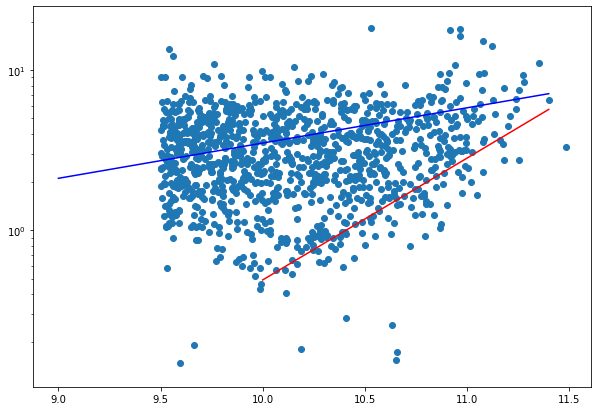

In [28]:
from matplotlib.lines import Line2D
plt.figure(figsize=[10,7])
plt.plot(mass_early,re_early_125,color='red',label='early-type')
plt.plot(mass_late,re_late_125,color='blue',label='late-type')
plt.scatter(hdu2_candels_copy['m_med'],hdu2_candels_copy['re_f160w'])
plt.yscale('log')
plt.ylim(0,25)

<ipython-input-8-9c404cdfccad>:1: RuntimeWarning: invalid value encountered in power
  h,xedges,yedges=np.histogram2d(np.log10(10**hdu2_candels_copy['M_med']/hdu2_candels_copy['re_f160w']**1.5),np.log10(10**hdu2_candels_copy['ssfr_uv_corr']*1e9),range=np.array([[8,13.5],[-2.5,2]]),bins=np.array([20,30]))


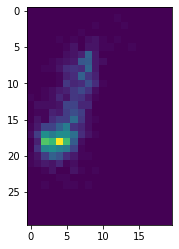

In [8]:
h,xedges,yedges=np.histogram2d(np.log10(10**hdu2_candels_copy['M_med']/hdu2_candels_copy['re_f160w']**1.5),np.log10(10**hdu2_candels_copy['ssfr_uv_corr']*1e9),range=np.array([[8,13.5],[-2.5,2]]),bins=np.array([20,30]))
plt.imshow(h.T)

In [9]:
percent = 0.9
temp = np.sort(h.flatten())[::-1]
count = np.sum(temp)
temp2 = 0
for num1 in range(0,len(temp)):
    temp2 += temp[num1]
    if temp2 > percent * count:
        break
cut1,pert1 = [temp[num1-1],(temp2-temp[num1])/count]
cut2,pert2 = [temp[num1],temp2/count]
f = interp1d([pert1,pert2],[cut1,cut2])
level_want = f(percent)

<ipython-input-16-c8d217bf2d5d>:7: RuntimeWarning: invalid value encountered in log10
  ax.scatter(np.log10(10**all_mass/all_re**1.5),np.log10((all_sfr/10**all_mass)*1e9),color='skyblue')
<ipython-input-16-c8d217bf2d5d>:10: RuntimeWarning: invalid value encountered in log10
  ax.errorbar(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5),np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9),xerr=xerr,yerr=yerr,fmt='o',color='red',ecolor='red',elinewidth=0.5)
<ipython-input-16-c8d217bf2d5d>:13: RuntimeWarning: invalid value encountered in log10
  ax.errorbar(np.log10(10**xagn_mass/xagn_re**1.5),np.log10((xagn_sfr/10**xagn_mass)*1e9),xerr=xerr,yerr=yerr,fmt='s',color='black',ecolor='black',elinewidth=0.5,mfc='none')
<ipython-input-16-c8d217bf2d5d>:26: RuntimeWarning: invalid value encountered in log10
  ax_histy.hist(np.log10((all_sfr/10**all_mass)*1e9),bins=12,orientation='horizontal',linewidth=2,histtype='step',color='skyblue',range=[-2,2],weights=np.ones_like(np.log10((all_sfr/10**all_mass)*1e9))/

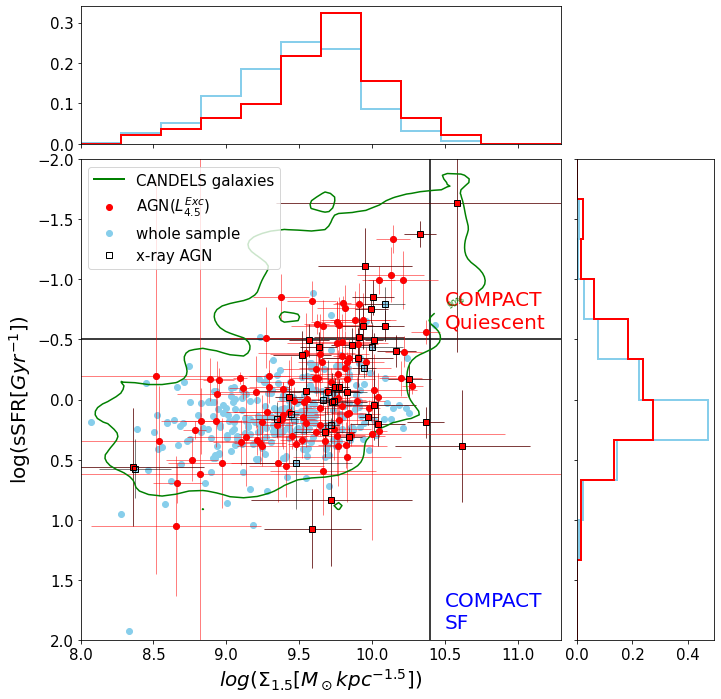

In [16]:
from scipy import ndimage
fig = plt.figure(figsize=(11,11))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),left=0.1, right=0.9, bottom=0.1, top=0.9,wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.plot([10.4,10.4],[-2.5,2.5],color='black')
ax.plot([7.5,11.5],[-0.5,-0.5],color='black')
ax.scatter(np.log10(10**all_mass/all_re**1.5),np.log10((all_sfr/10**all_mass)*1e9),color='skyblue')
xerr = np.sqrt((10**agn_l4p5_mass*np.log(10)/agn_l4p5_re**1.5)**2*agn_l4p5_masserr**2 + (1.5*10**agn_l4p5_mass/agn_l4p5_re**2.5)**2*agn_l4p5_reerr**2)/(10**agn_l4p5_mass*np.log(10)/agn_l4p5_re**1.5)
yerr = np.sqrt((agn_l4p5_sfrerr/10**agn_l4p5_mass)**2+(agn_l4p5_sfr*np.log(10)*agn_l4p5_masserr/10**agn_l4p5_mass)**2)/(agn_l4p5_sfr*np.log(10)/10**agn_l4p5_mass)
ax.errorbar(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5),np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9),xerr=xerr,yerr=yerr,fmt='o',color='red',ecolor='red',elinewidth=0.5)
xerr = np.sqrt((10**xagn_mass*np.log(10)/xagn_re**1.5)**2*xagn_masserr**2 + (1.5*10**xagn_mass/xagn_re**2.5)**2*xagn_reerr**2)/(10**xagn_mass*np.log(10)/xagn_re**1.5)
yerr = np.sqrt((xagn_sfrerr/10**xagn_mass)**2+(xagn_sfr*np.log(10)*xagn_masserr/10**xagn_mass)**2)/(xagn_sfr*np.log(10)/10**xagn_mass)
ax.errorbar(np.log10(10**xagn_mass/xagn_re**1.5),np.log10((xagn_sfr/10**xagn_mass)*1e9),xerr=xerr,yerr=yerr,fmt='s',color='black',ecolor='black',elinewidth=0.5,mfc='none')
data = ndimage.zoom(h,[3,5])
x,y = np.linspace(xedges[0],xedges[-1],data.shape[0]),np.linspace(yedges[0],yedges[-1],data.shape[1])
contour = ax.contour(x,y,data.T,levels=[float(level_want)],colors=['green']) #xedges[0:xedges.shape[0]-1],yedges[0:yedges.shape[0]-1],h.T
ax.clabel(contour,contour.levels,inline=True,fontsize=8,fmt={1:'100%',float(level_want):'90%'},use_clabeltext=True,inline_spacing=0)
legend_elements=[Line2D([0],[0],lw=2,color='g',label='CANDELS galaxies'),Line2D([0],[0],color='red',lw=0,marker='o',label=r'AGN($L_{4.5}^{Exc}$)'),Line2D([0],[0],color='skyblue',lw=0,marker='o',label='whole sample'),Line2D([0],[0],color='black',lw=0,marker='s',markerfacecolor='none',label='x-ray AGN')]
ax.legend(handles=legend_elements,fontsize=15,loc='upper left')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(np.log10(10**all_mass/all_re**1.5),bins=12,linewidth=2,histtype='step',color='skyblue',range=[8,11.3],weights=np.ones_like(np.log10(10**all_mass/all_re**1.5))/len(np.log10(10**all_mass/all_re**1.5)))
ax_histx.hist(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5),bins=12,linewidth=2,histtype='step',color='red',range=[8,11.3],weights=np.ones_like(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5))/len(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5)))
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(np.log10((all_sfr/10**all_mass)*1e9),bins=12,orientation='horizontal',linewidth=2,histtype='step',color='skyblue',range=[-2,2],weights=np.ones_like(np.log10((all_sfr/10**all_mass)*1e9))/len(np.log10((all_sfr/10**all_mass)*1e9)))
ax_histy.hist(np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9),bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[-2,2],weights=np.ones_like(np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9))/len(np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9)))
ax.text(10.5,-0.6,'COMPACT\nQuiescent',fontsize=20,color='red')
ax.text(10.5,1.9,'COMPACT\nSF',fontsize=20,color='blue')
ax.set_xlim(8,11.3)
ax.tick_params(axis='both',labelsize=15)
ax_histx.tick_params(axis='y',labelsize=15)
ax_histy.tick_params(axis='x',labelsize=15)
ax.set_ylim(2,-2)
ax.set_xlabel('$log(\Sigma_{1.5}[M_\odot kpc^{-1.5}])$',fontsize=20)
ax.set_ylabel('log(sSFR$[Gyr^{-1}])$',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/barro-agn-l8sfr_3sigma.png')
# plt.savefig('/Users/lpr/Documents/paper latex/barro_l4p5_hist_l8sfr.pdf')

# # -----------------------------------------------------------------------------------------------------------------------
# plt.figure(figsize=[10,7])
# plt.plot([10.4,10.4],[-2.5,2.5],color='black')# plt.plot([10.3,10.3],[-2.5,2.5],color='black')
# plt.plot([7.5,11.5],[-0.5,-0.5],color='black')
# # cmap = colors.ListedColormap(['r', 'g', 'b','y'])
# # xerr = np.sqrt((10**all_mass*np.log(10)/all_re**1.5)**2*all_masserr**2 + (1.5*10**all_mass/all_re**2.5)**2*all_reerr**2)/(10**all_mass*np.log(10)/all_re**1.5)
# # yerr = np.sqrt((all_sfrerr/10**all_mass)**2+(all_sfr*np.log(10)*all_masserr/10**all_mass)**2)/(all_sfr*np.log(10)/10**all_mass)
# # plt.scatter(np.log10(10**all_mass/all_re**1.5),np.log10((all_sfr/10**all_mass)*1e9),color='skyblue')
# # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# # xerr = np.sqrt((10**agn_l4p5_mass*np.log(10)/agn_l4p5_re**1.5)**2*agn_l4p5_masserr**2 + (1.5*10**agn_l4p5_mass/agn_l4p5_re**2.5)**2*agn_l4p5_reerr**2)/(10**agn_l4p5_mass*np.log(10)/agn_l4p5_re**1.5)
# # yerr = np.sqrt((agn_l4p5_sfrerr/10**agn_l4p5_mass)**2+(agn_l4p5_sfr*np.log(10)*agn_l4p5_masserr/10**agn_l4p5_mass)**2)/(agn_l4p5_sfr*np.log(10)/10**agn_l4p5_mass)
# # plt.errorbar(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5),np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9),xerr=xerr,yerr=yerr,fmt='o',color='red',ecolor='red',elinewidth=0.5)
# plt.scatter(np.log10(10**agn_l4p5_mass/agn_l4p5_re**1.5),np.log10((agn_l4p5_sfr/10**agn_l4p5_mass)*1e9),c=agn_l4p5_re,norm=colors.Normalize(vmin=0,vmax=3))#,fmt='o',color='red',ecolor='red',elinewidth=0.5)
# # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# # xerr = np.sqrt((10**xagn_mass*np.log(10)/xagn_re**1.5)**2*xagn_masserr**2 + (1.5*10**xagn_mass/xagn_re**2.5)**2*xagn_reerr**2)/(10**xagn_mass*np.log(10)/xagn_re**1.5)
# # yerr = np.sqrt((xagn_sfrerr/10**xagn_mass)**2+(xagn_sfr*np.log(10)*xagn_masserr/10**xagn_mass)**2)/(xagn_sfr*np.log(10)/10**xagn_mass)
# # plt.errorbar(np.log10(10**xagn_mass/xagn_re**1.5),np.log10((xagn_sfr/10**xagn_mass)*1e9),xerr=xerr,yerr=yerr,fmt='s',color='black',ecolor='black',elinewidth=0.5,mfc='none')
# # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# plt.colorbar()
# # data = ndimage.zoom(h,[3,5])
# # x,y = np.linspace(xedges[0],xedges[-1],data.shape[0]),np.linspace(yedges[0],yedges[-1],data.shape[1])
# # contour = plt.contour(x,y,data.T,levels=[float(level_want)],colors=['green']) #xedges[0:xedges.shape[0]-1],yedges[0:yedges.shape[0]-1],h.T
# # plt.clabel(contour,contour.levels,inline=True,fontsize=8,fmt={1:'100%',float(level_want):'90%'},use_clabeltext=True,inline_spacing=0)
# # plt.scatter(np.log10(10**agn_mass/agn_re**1.5),np.log10((agn_sfr/10**agn_mass)*1e9),s=20,marker='s',label='AGN',color='red')
# # plt.scatter(np.log10(10**xagn_mass/xagn_re**1.5),np.log10((xagn_sfr/10**xagn_mass)*1e9),s=60,marker='P',label='$L_X>10^{42}$',facecolor='none',color='black')
# # plt.scatter(np.log10(10**com_mass/com_re**1.5),np.log10((com_sfr/10**com_mass)*1e9),c=com_morph,s=20,marker='^',label='Composite',norm=colors.BoundaryNorm([0.5,1.5,2.5,3.5,4.5],cmap.N),cmap=cmap)#,color='green')
# # plt.scatter(np.log10(10**sf_mass/sf_re**1.5),np.log10((sf_sfr/10**sf_mass)*1e9),c=sf_morph,s=20,marker='*',label='Star-Forming',norm=colors.BoundaryNorm([0.5,1.5,2.5,3.5,4.5],cmap.N),cmap=cmap)#,color='blue')
# # plt.legend(fontsize=15,loc='upper left',labelspacing=0.4,handletextpad=0.11,borderaxespad=0.2,markerscale=1.5)
# # plt.xticks(fontsize=20)
# # plt.yticks(fontsize=20)
# # plt.text(9,-1,'0.8<z<1',fontsize=15)
# plt.text(10.6,-1,'COMPACT\nQuiescent',fontsize=20,color='red')
# plt.text(10.6,0.2,'COMPACT\nSF',fontsize=20,color='blue')
# # plt.text(9,-1.5,'0.8<z<1',fontsize=15)
# plt.xlabel('$log(\Sigma_{1.5}[M_\odot kpc^{-1.5}])$',fontsize=20)
# # plt.colorbar(extend='both')
# plt.xlim(8,11.3)
# plt.ylim(2,-2.5)
# plt.ylabel('log(sSFR$[Gyr^{-1}])$',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/candels_barro_l4p5_hist.pdf')
# # plt.savefig('/Users/lpr/Documents/paper latex/ssfr-sigma15_right1.pdf')

In [58]:
print(agn_l4p5_1[np.where(np.log10(10**agn_l4p5_1['LMASS']/agn_l4p5_1['re_f160w']**1.5)>10.4)]['ID'])
print(agn_l4p5_2[np.where(np.log10(10**agn_l4p5_2['LMASS']/agn_l4p5_2['re_f160w']**1.5)>10.4)]['ID'])
print(agn_l4p5_3[np.where(np.log10(10**agn_l4p5_3['LMASS']/agn_l4p5_3['re_f160w']**1.5)>10.4)]['ID'])

[12353]
[ 9988 12288 34172]
[]


In [19]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
upper = Polygon([(8,-0.5),(10.4,-0.5),(10.4,-2.5),(8,-2.5)])
lower = Polygon([(8,-0.5),(10.4,-0.5),(10.4,2),(8,2)])
up_agn = 0
up_all = 0
down_agn = 0
down_all = 0
for num in range(0,len(xagn_mass)):
    x = np.log10(10**xagn_mass[num]/xagn_re[num]**1.5)
    y = np.log10((xagn_sfr[num]/10**xagn_mass[num])*1e9)
    if upper.contains(Point(x,y)):
        up_agn += 1
    elif lower.contains(Point(x,y)):
        down_agn += 1
for num in range(0,len(all_mass)):
    x = np.log10(10**all_mass[num]/all_re[num]**1.5)
    y = np.log10((all_sfr[num]/10**all_mass[num])*1e9)
    if upper.contains(Point(x,y)):
        up_all += 1
    elif lower.contains(Point(x,y)):
        down_all += 1
print(down_all,down_agn)
print(up_all,up_agn)

419 39
26 6


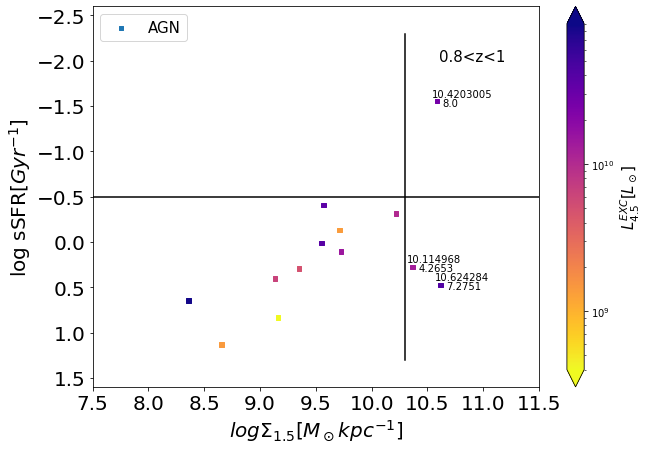

In [59]:
plt.figure(figsize=[10,7])
plt.plot([10.3,10.3],[-2.3,1.3],color='black')
plt.plot([7.5,11.5],[-0.5,-0.5],color='black')
plt.scatter(np.log10(10**agn_mass/agn_re**1.5),np.log10((agn_sfr/10**agn_mass)*1e9),c=agn_l4p5,s=20,marker='s',label='AGN',norm=colors.LogNorm(vmin=4e8,vmax=9e10),cmap='plasma_r')
cb = plt.colorbar(extend='both')
cb.set_label('$L_{4.5}^{EXC}[L_\odot]$',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(10.6,-2,'0.8<z<1',fontsize=15)
agn1_indx = np.where(np.log10(10**agn1['MASS']/agn1['re_f160w']**1.5)>10.3)
agn2_indx = np.where(np.log10(10**agn2['MASS']/agn2['re_f160w']**1.5)>10.3)
agn3_indx = np.where(np.log10(10**agn3['MASS']/agn3['re_f160w']**1.5)>10.3)
if agn1_indx[0].size != 0:
    for num4 in range(0,agn1_indx[0].size):
        plt.text(np.log10(10**agn1[agn1_indx]['MASS'][num4]/agn1[agn1_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((agn1[agn1_indx]['SFR'][num4]/10**agn1[agn1_indx]['MASS'][num4])*1e9)+0.05,agn1[agn1_indx]['n_f160w'][num4])
        plt.text(np.log10(10**agn1[agn1_indx]['MASS'][num4]/agn1[agn1_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((agn1[agn1_indx]['SFR'][num4]/10**agn1[agn1_indx]['MASS'][num4])*1e9)-0.05,np.log10(agn1[agn1_indx]['L4P5EX'][num4]))
if agn2_indx[0].size != 0:
    for num4 in range(0,agn2_indx[0].size):
        plt.text(np.log10(10**agn2[agn2_indx]['MASS'][num4]/agn2[agn2_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((agn2[agn2_indx]['SFR'][num4]/10**agn2[agn2_indx]['MASS'][num4])*1e9)+0.05,agn2[agn2_indx]['n_f160w'][num4])
        plt.text(np.log10(10**agn2[agn2_indx]['MASS'][num4]/agn2[agn2_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((agn2[agn2_indx]['SFR'][num4]/10**agn2[agn2_indx]['MASS'][num4])*1e9)-0.05,np.log10(agn2[agn2_indx]['L4P5EX'][num4]))
if agn3_indx[0].size != 0:
    for num4 in range(0,agn3_indx[0].size):
        plt.text(np.log10(10**agn3[agn3_indx]['MASS'][num4]/agn3[agn3_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((agn3[agn3_indx]['SFR'][num4]/10**agn3[agn3_indx]['MASS'][num4])*1e9)+0.05,agn3[agn3_indx]['n_f160w'][num4])
        plt.text(np.log10(10**agn3[agn3_indx]['MASS'][num4]/agn3[agn3_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((agn3[agn3_indx]['SFR'][num4]/10**agn3[agn3_indx]['MASS'][num4])*1e9)-0.05,np.log10(agn3[agn3_indx]['L4P5EX'][num4]))
plt.xlabel('$log\Sigma_{1.5}[M_\odot kpc^{-1}]$',fontsize=20)
plt.ylim(1.6,-2.6)
plt.xlim(7.5,11.5)
plt.ylabel('log sSFR$[Gyr^{-1}]$',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/ssfr-sigma15_left1_agn.pdf')

Text(0, 0.5, 'log sSFR$[Gyr^{-1}]$')

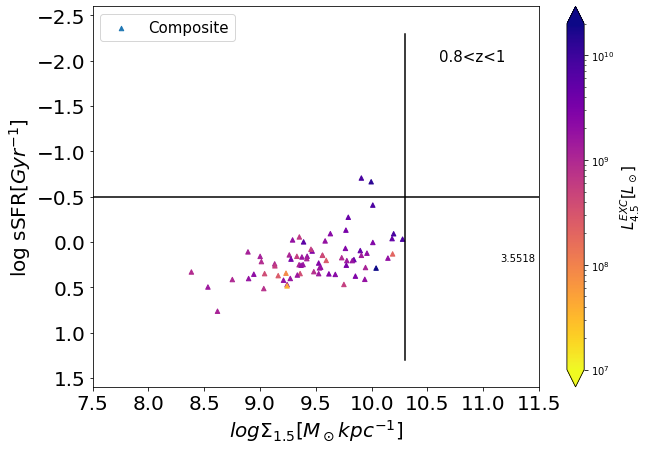

In [39]:
plt.figure(figsize=[10,7])
plt.plot([10.3,10.3],[-2.3,1.3],color='black')
plt.plot([7.5,11.5],[-0.5,-0.5],color='black')
plt.scatter(np.log10(10**com_mass/com_re**1.5),np.log10((com_sfr/10**com_mass)*1e9),c=com_l4p5,s=20,marker='^',label='Composite',norm=colors.LogNorm(vmin=1e7,vmax=2e10),cmap='plasma_r')
cb = plt.colorbar(extend='both')
cb.set_label('$L_{4.5}^{EXC}[L_\odot]$',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(10.6,-2,'0.8<z<1',fontsize=15)
com1_indx = np.where(np.log10(10**com1['MASS']/com1['re_f160w']**1.5)>10.3)
com2_indx = np.where(np.log10(10**com2['MASS']/com2['re_f160w']**1.5)>10.3)
com3_indx = np.where(np.log10(10**com3['MASS']/com3['re_f160w']**1.5)>10.3)
if com1_indx[0].size != 0:
    for num4 in range(0,com1_indx[0].size):
        plt.text(np.log10(10**com1[com1_indx]['MASS'][num4]/com1[com1_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((com1[com1_indx]['SFR'][num4]/10**com1[com1_indx]['MASS'][num4])*1e9)+0.05,com1[com1_indx]['n_f160w'][num4])
if com2_indx[0].size != 0:
    for num4 in range(0,com2_indx[0].size):
        plt.text(np.log10(10**com2[com2_indx]['MASS'][num4]/com2[com2_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((com2[com2_indx]['SFR'][num4]/10**com2[com2_indx]['MASS'][num4])*1e9)+0.05,com2[com2_indx]['n_f160w'][num4])
if com3_indx[0].size != 0:
    for num4 in range(0,com3_indx[0].size):
        plt.text(np.log10(10**com3[com3_indx]['MASS'][num4]/com3[com3_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((com3[com3_indx]['SFR'][num4]/10**com3[com3_indx]['MASS'][num4])*1e9)+0.05,com3[com3_indx]['n_f160w'][num4])
plt.xlabel('$log\Sigma_{1.5}[M_\odot kpc^{-1}]$',fontsize=20)
plt.ylim(1.6,-2.6)
plt.xlim(7.5,11.5)
plt.ylabel('log sSFR$[Gyr^{-1}]$',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/ssfr-sigma15_left1_com.pdf')

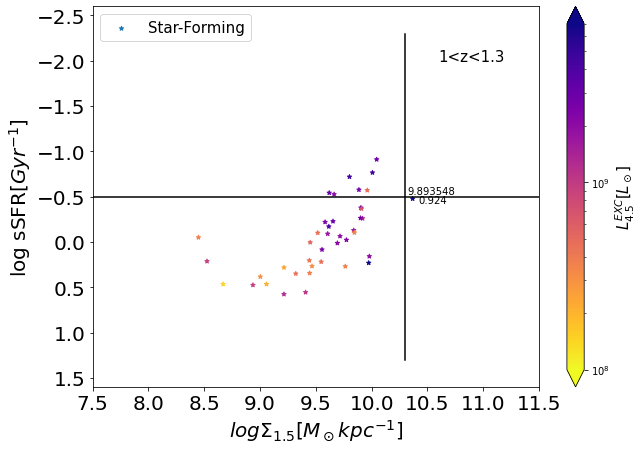

In [19]:
plt.figure(figsize=[10,7])
plt.plot([10.3,10.3],[-2.3,1.3],color='black')
plt.plot([7.5,11.5],[-0.5,-0.5],color='black')
plt.scatter(np.log10(10**sf_mass/sf_re**1.5),np.log10((sf_sfr/10**sf_mass)*1e9),c=sf_l4p5,s=20,marker='*',label='Star-Forming',norm=colors.LogNorm(vmin=1e8,vmax=7e9),cmap='plasma_r')
cb = plt.colorbar(extend='both')
cb.set_label('$L_{4.5}^{EXC}[L_\odot]$',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(10.6,-2,'1<z<1.3',fontsize=15)
sf1_indx = np.where(np.log10(10**sf1['MASS']/sf1['re_f160w']**1.5)>10.3)
sf2_indx = np.where(np.log10(10**sf2['MASS']/sf2['re_f160w']**1.5)>10.3)
sf3_indx = np.where(np.log10(10**sf3['MASS']/sf3['re_f160w']**1.5)>10.3)
# sf1_indx = np.where(np.log10((sf1['SFR']/10**sf1['MASS'])*1e9)<-0.5)
# sf2_indx = np.where(np.log10((sf2['SFR']/10**sf2['MASS'])*1e9)<-0.5)
# sf3_indx = np.where(np.log10((sf3['SFR']/10**sf3['MASS'])*1e9)<-0.5)

if sf1_indx[0].size != 0:
    for num4 in range(0,sf1_indx[0].size):
        plt.text(np.log10(10**sf1[sf1_indx]['MASS'][num4]/sf1[sf1_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((sf1[sf1_indx]['SFR'][num4]/10**sf1[sf1_indx]['MASS'][num4])*1e9)+0.05,sf1[sf1_indx]['n_f160w'][num4])
        plt.text(np.log10(10**sf1[sf1_indx]['MASS'][num4]/sf1[sf1_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((sf1[sf1_indx]['SFR'][num4]/10**sf1[sf1_indx]['MASS'][num4])*1e9)-0.05,np.log10(sf1[sf1_indx]['L4P5EX'][num4]))
if sf2_indx[0].size != 0:
    for num4 in range(0,sf2_indx[0].size):
        plt.text(np.log10(10**sf2[sf2_indx]['MASS'][num4]/sf2[sf2_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((sf2[sf2_indx]['SFR'][num4]/10**sf2[sf2_indx]['MASS'][num4])*1e9)+0.05,sf2[sf2_indx]['n_f160w'][num4])
        plt.text(np.log10(10**sf2[sf2_indx]['MASS'][num4]/sf2[sf2_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((sf2[sf2_indx]['SFR'][num4]/10**sf2[sf2_indx]['MASS'][num4])*1e9)-0.05,np.log10(sf2[sf2_indx]['L4P5EX'][num4]))
if sf3_indx[0].size != 0:
    for num4 in range(0,sf3_indx[0].size):
        plt.text(np.log10(10**sf3[sf3_indx]['MASS'][num4]/sf3[sf3_indx]['re_f160w'][num4]**1.5)+0.05,np.log10((sf3[sf3_indx]['SFR'][num4]/10**sf3[sf3_indx]['MASS'][num4])*1e9)+0.05,sf3[sf3_indx]['n_f160w'][num4])
        plt.text(np.log10(10**sf3[sf3_indx]['MASS'][num4]/sf3[sf3_indx]['re_f160w'][num4]**1.5)-0.05,np.log10((sf3[sf3_indx]['SFR'][num4]/10**sf3[sf3_indx]['MASS'][num4])*1e9)-0.05,np.log10(sf3[sf3_indx]['L4P5EX'][num4]))
plt.xlabel('$log\Sigma_{1.5}[M_\odot kpc^{-1}]$',fontsize=20)
plt.ylim(1.6,-2.6)
plt.xlim(7.5,11.5)
plt.ylabel('log sSFR$[Gyr^{-1}]$',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/ssfr-sigma15_right1_sf.pdf')

In [7]:
from scipy.interpolate import interp1d
def mass_size(mass,loga,alpha):
    m = (10**mass/10**10)/5
    re = (10**loga)*(m**alpha)
    return re
loga_early=[0.60,0.42,0.22,0.09,-0.05,-0.06]
alpha_early=[0.75,0.71,0.76,0.76,0.76,0.79]
loga_late=[0.86,0.78,0.70,0.65,0.55,0.51]
alpha_late=[0.25,0.22,0.22,0.23,0.22,0.18]
z_mass_size=[0.25,0.75,1.25,1.75,2.25,2.75]
def Da(z,H0,omega_matter):
    angular_distance = flcdm(H0=H0,Om0=omega_matter).angular_diameter_distance(z).to_value()
    return angular_distance
loga_early_9=interp1d(z_mass_size,loga_early)(0.9)
alpha_early_9=interp1d(z_mass_size,alpha_early)(0.9)
loga_late_9=interp1d(z_mass_size,loga_late)(0.9)
alpha_late_9=interp1d(z_mass_size,alpha_late)(0.9)
mass_late = np.linspace(9,11.4,100)
mass_early = np.linspace(10,11.4,100)
re_late_9 = (Da(0.9,71,0.27)/Da(0.9,70,0.3))**(2*alpha_late_9-1) * mass_size(mass_late,loga_late_9,alpha_late_9)
re_early_9 = (Da(0.9,71,0.27)/Da(0.9,70,0.3))**(2*alpha_early_9-1) * mass_size(mass_early,loga_early_9,alpha_early_9)
re_late_125 = (Da(1.25,71,0.27)/Da(1.25,70,0.3))**(2*0.22-1) * mass_size(mass_late,0.7,0.22)
re_early_125 = (Da(1.25,71,0.27)/Da(1.25,70,0.3))**(2*0.76-1) * mass_size(mass_early,0.22,0.76)

In [55]:
agn_l4p5_re = agn_l4p5_re*10**((-0.35+0.12*agn_l4p5_z-0.25*np.log10(10**agn_l4p5_mass/10**10))*np.log10(5000./(16000/(1+agn_l4p5_z))))
com_re = com_re*10**((-0.35+0.12*com_z-0.25*np.log10(10**com_mass/10**10))*np.log10(5000./(16000/(1+com_z))))
sf_re = sf_re*10**((-0.35+0.12*sf_z-0.25*np.log10(10**sf_mass/10**10))*np.log10(5000./(16000/(1+sf_z))))

<ipython-input-56-fd45afa774d3>:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,25)


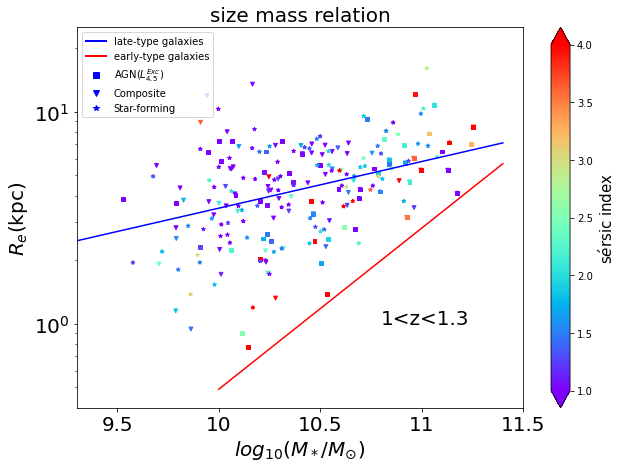

In [56]:
from matplotlib.lines import Line2D
plt.figure(figsize=[10,7])
plt.plot(mass_early,re_early_125,color='red',label='early-type')
plt.plot(mass_late,re_late_125,color='blue',label='late-type')
plt.scatter(agn_l4p5_mass,agn_l4p5_re,c=agn_l4p5_n,cmap='rainbow',s=15,marker='s',norm=colors.Normalize(vmin=1,vmax=4))
plt.scatter(com_mass,com_re,c=com_n,cmap='rainbow',s=15,marker='v',norm=colors.Normalize(vmin=1,vmax=4))
plt.scatter(sf_mass,sf_re,c=sf_n,cmap='rainbow',s=15,marker='*',norm=colors.Normalize(vmin=1,vmax=4))
legend_elements=[Line2D([0],[0],lw=2,color='b',label='late-type galaxies'),Line2D([0],[0],lw=2,color='r',label='early-type galaxies'),Line2D([0],[0],color='b',lw=0,marker='s',label=r'AGN($L_{4.5}^{Exc}$)'),Line2D([0],[0],color='b',lw=0,marker='v',label='Composite'),Line2D([0],[0],color='b',lw=0,marker='*',label='Star-forming')]
cb = plt.colorbar(extend='both')
cb.set_label(r's$\acute{e}$rsic index',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.text(10.8,1,'1<z<1.3',fontsize=20)
# plt.text(10.8,1,'0.8<z$\leq$1',fontsize=20)
plt.legend(handles=legend_elements,fontsize=10,loc='upper left')
plt.yscale('log')
plt.xticks(ticks=[9,9.5,10,10.5,11,11.5],labels=[9,9.5,10,10.5,11,11.5],fontsize=20)
plt.yticks(fontsize=20)
plt.title('size mass relation',fontsize=20)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylim(0,25)
plt.xlim(9.3,11.5)
plt.ylabel('$R_e$(kpc)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/mass_size_n_sed_right1_l4p5.png')
plt.savefig('/Users/lpr/Documents/paper latex/mass_size_n_sed_right1.pdf')

<ipython-input-42-3d7d3b417117>:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,17)


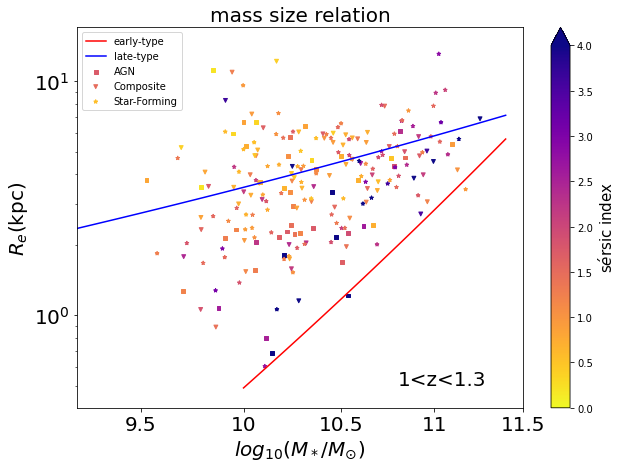

In [42]:
plt.figure(figsize=[10,7])
plt.plot(mass_early,re_early_125,color='red',label='early-type')
plt.plot(mass_late,re_late_125,color='blue',label='late-type')
plt.scatter(agn_mass,agn_re,c=agn_n,cmap='plasma_r',s=15,marker='s',label='AGN',norm=colors.Normalize(vmin=0,vmax=4))
plt.scatter(com_mass,com_re,c=com_n,cmap='plasma_r',s=15,marker='v',label='Composite',norm=colors.Normalize(vmin=0,vmax=4))
plt.scatter(sf_mass,sf_re,c=sf_n,cmap='plasma_r',s=15,marker='*',label='Star-Forming',norm=colors.Normalize(vmin=0,vmax=4))
cb = plt.colorbar(extend='max')
cb.set_label(r's$\acute{e}$rsic index',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.text(10.8,0.5,'1<z<1.3',fontsize=20)
plt.legend(fontsize=10,loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks=[9,9.5,10,10.5,11,11.5],labels=[9,9.5,10,10.5,11,11.5],fontsize=20)
plt.yticks(fontsize=20)
plt.title('mass size relation',fontsize=20)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylim(0,17)
plt.xlim(9.2,11.5)
plt.ylabel('$R_e$(kpc)',fontsize=20)
# plt.savefig('/Users/lpr/Documents/答辩/2021开题/mass_size_n_sed_right1.png')
plt.savefig('/Users/lpr/Documents/paper latex/mass_size_n_sed_right1.pdf')

In [ ]:
print(4000*1.8)
print(4000*2.3)

In [ ]:
normal_ssfr = np.concatenate((normal1['SSFR_UV_CORR'],normal2['SSFR_UV_CORR'],normal3['SSFR_UV_CORR']),axis=0)
lirg_ssfr = np.concatenate((lirg1['SSFR_UV_CORR'],lirg2['SSFR_UV_CORR'],lirg3['SSFR_UV_CORR']),axis=0)
ulirg_ssfr = np.concatenate((ulirg1['SSFR_UV_CORR'],ulirg2['SSFR_UV_CORR'],ulirg3['SSFR_UV_CORR']),axis=0)

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(normal_mass,normal_ssfr,s=10,color='blue',label='non-LIRGs')
plt.scatter(lirg_mass,lirg_ssfr,s=10,color='green',label='LIRGs')
plt.scatter(ulirg_mass,ulirg_ssfr,s=10,color='red',label='ULIRGs')
plt.legend(loc=0,fontsize=15)
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('main sequence',fontsize=20)
plt.xlabel(r'Mass($M_\odot$)',fontsize=20)
plt.ylabel(r'SSFR(yr$^{-1}$)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/mainsequen_ssfr.pdf')

In [ ]:
normal_sfr = np.concatenate(((normal1['MASS']*10**normal1['SSFR_UV_CORR']),(normal2['MASS']*10**normal2['SSFR_UV_CORR']),(normal3['MASS']*10**normal3['SSFR_UV_CORR'])),axis=0)
lirg_sfr = np.concatenate(((lirg1['MASS']*10**lirg1['SSFR_UV_CORR']),(lirg2['MASS']*10**lirg2['SSFR_UV_CORR']),(lirg3['MASS']*10**lirg3['SSFR_UV_CORR'])),axis=0)
ulirg_sfr = np.concatenate(((ulirg1['MASS']*10**ulirg1['SSFR_UV_CORR']),(ulirg2['MASS']*10**ulirg2['SSFR_UV_CORR']),(ulirg3['MASS']*10**ulirg3['SSFR_UV_CORR'])),axis=0)

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(normal_mass,normal_sfr,s=10,color='blue',label='normal')
plt.scatter(lirg_mass,lirg_sfr,s=10,color='green',label='LIRGs')
plt.scatter(ulirg_mass,ulirg_sfr,s=10,color='red',label='ULIRGs')
plt.legend(loc=0,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('main sequence',fontsize=20)
plt.xlabel(r'Mass($M_\odot$)',fontsize=20)
plt.ylabel(r'SFR($M_\odot$/yr)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/mainsequen_sfr.pdf')

In [ ]:
all_sfr = np.concatenate((normal_sfr,lirg_sfr,ulirg_sfr),axis=0)
all_ssfr = np.concatenate((normal_ssfr,lirg_ssfr,ulirg_ssfr),axis=0)

In [42]:
normal_l4p5ex = np.concatenate((normal1['L4P5EX'],normal2['L4P5EX'],normal3['L4P5EX']),axis=0)
lirg_l4p5ex = np.concatenate((lirg1['L4P5EX'],lirg2['L4P5EX'],lirg3['L4P5EX']),axis=0)
ulirg_l4p5ex = np.concatenate((ulirg1['L4P5EX'],ulirg2['L4P5EX'],ulirg3['L4P5EX']),axis=0)

NameError: name 'normal1' is not defined

In [ ]:
plt.figure(figsize=[10,7])
plt.scatter(all_re,all_l4p5ex,c=all_sfr,s=10,cmap='viridis_r')
cb = plt.colorbar()
cb.set_label('$L_{IR}/L_{\odot}$',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.yscale('log')
plt.ylim(1e6,1e12)
plt.xlim(0,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'AGN strength vs. size')
plt.xlabel('$R_e$ (kpc)',fontsize=20)
plt.ylabel('$L_{4.5}^{exc}/L_{\odot}$',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/l4p5-re_lir.pdf')

In [ ]:
plt.scatter(all_re,all_sfr,s=10)#,s=10,cmap='viridis_r')
plt.xlim(0,15)
# plt.ylim(0,400)
plt.yscale('log')

In [56]:
agn_l4p5ex = np.concatenate((agn1['L4P5EX'],agn2['L4P5EX'],agn3['L4P5EX']),axis=0)
com_l4p5ex = np.concatenate((com1['L4P5EX'],com2['L4P5EX'],com3['L4P5EX']),axis=0)
sf_l4p5ex = np.concatenate((sf1['L4P5EX'],sf2['L4P5EX'],sf3['L4P5EX']),axis=0)

In [57]:
len(agn1)+len(agn2)+len(agn3)

62

Text(0, 0.5, '$L_{4.5}^{exc}/L_{\\odot}$')

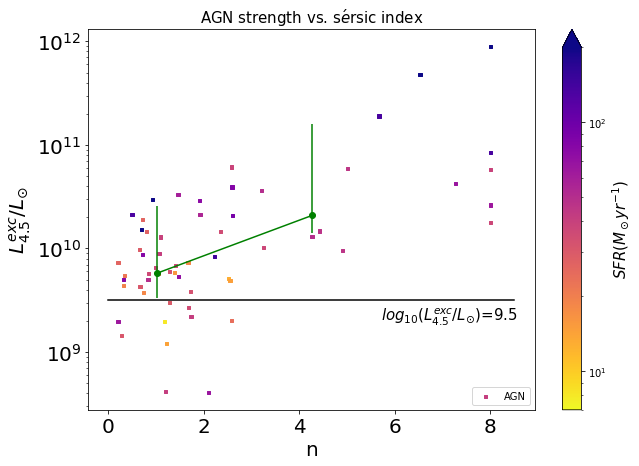

In [149]:
plt.figure(figsize=[10,7])
plt.plot([0,8.5],[10**9.5,10**9.5],color='black')
plt.text(5.7,2e9,'$log_{10}(L_{4.5}^{exc}/L_{\odot})$=9.5',fontsize=15)
plt.scatter(agn_n,agn_l4p5,c=agn_sfr,s=10,cmap='plasma_r',marker='s',label='AGN',norm=colors.LogNorm(vmin=7,vmax=200))#7,200
# # indx = [np.where((agn_n>0)&(agn_n<2)&(agn_l4p5>0))[0],np.where((agn_n>=2)&(agn_n<4)&(agn_l4p5>0))[0],np.where((agn_n>=4)&(agn_n<=8)&(agn_l4p5>0))[0]]
indx = [np.where((agn_n>0)&(agn_n<2)&(agn_l4p5>0))[0],np.where((agn_n>=2)&(agn_l4p5>0))[0]]
# # median_n = np.median(agn_n[indx[0]]),np.median(agn_n[indx[1]]),np.median(agn_n[indx[2]])
median_n = np.median(agn_n[indx[0]]),np.median(agn_n[indx[1]])
# # median_l4p5 = np.median(agn_l4p5[indx[0]]),np.median(agn_l4p5[indx[1]]),np.median(agn_l4p5[indx[2]])
median_l4p5 = np.median(agn_l4p5[indx[0]]),np.median(agn_l4p5[indx[1]])
# # error = [np.mean(agn_l4p5[indx[0]])/np.sqrt(len(agn_l4p5[indx[0]])),np.mean(agn_l4p5[indx[1]])/np.sqrt(len(agn_l4p5[indx[1]])),np.mean(agn_l4p5[indx[2]])/np.sqrt(len(agn_l4p5[indx[2]]))]
l4p5_16 = [(np.sort(agn_l4p5[indx[0]])[int(0.16*len(agn_l4p5[indx[0]]))]+np.sort(agn_l4p5[indx[0]])[int(0.16*len(agn_l4p5[indx[0]]))+1])/2,(np.sort(agn_l4p5[indx[1]])[int(0.16*len(agn_l4p5[indx[1]]))]+np.sort(agn_l4p5[indx[1]])[int(0.16*len(agn_l4p5[indx[1]]))+1])/2]
l4p5_84 = [(np.sort(agn_l4p5[indx[0]])[int(0.84*len(agn_l4p5[indx[0]]))]+np.sort(agn_l4p5[indx[0]])[int(0.84*len(agn_l4p5[indx[0]]))+1])/2,(np.sort(agn_l4p5[indx[1]])[int(0.84*len(agn_l4p5[indx[1]]))]+np.sort(agn_l4p5[indx[1]])[int(0.84*len(agn_l4p5[indx[1]]))+1])/2]
error = [l4p5_16,l4p5_84]
# # error = [np.mean(agn_l4p5[indx[0]])/np.sqrt(len(agn_l4p5[indx[0]])),np.mean(agn_l4p5[indx[1]])/np.sqrt(len(agn_l4p5[indx[1]]))]
plt.errorbar(median_n,median_l4p5,yerr=error,color='green',marker='o')
cb = plt.colorbar(extend='max')
cb.set_label('$SFR (M_\odot yr^{-1}$)',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(fontsize=10,loc='lower right')
plt.yscale('log')
# plt.ylim(3e8,1e12)
# plt.xlim(0,8.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'AGN strength vs. s${\'e}$rsic index',fontsize=15)
plt.xlabel('n',fontsize=20)
plt.ylabel('$L_{4.5}^{exc}/L_{\odot}$',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/l4p5-n_sfr_agn.pdf')
# plt.savefig('/Users/lpr/Documents/答辩/2021开题/l4p5-n_sfr_agn.png')

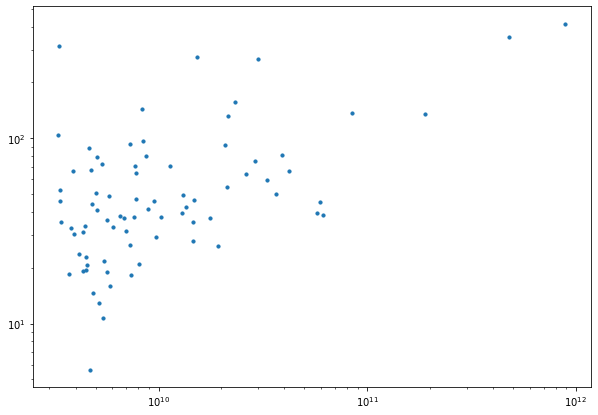

In [163]:
plt.figure(figsize=[10,7])
# plt.plot([0,8.5],[10**9.5,10**9.5],color='black')
# plt.text(5.7,1e9,'$log_{10}(L_{4.5}^{exc}/L_{\odot})$=9.5',fontsize=15)
plt.scatter(agn_l4p5_l4p5,agn_l4p5_sfr,s=10,marker='o')#,c=sf_sfr,cmap='plasma_r',norm=colors.Normalize(vmin=0,vmax=150)
# indx = [np.where((sf_n>0)&(sf_n<2))[0],np.where((sf_n>2)&(sf_n<4))[0],np.where((sf_n>4)&(sf_n<8))[0]]
# median_n = np.median(sf_n[indx[0]]),np.median(sf_n[indx[1]]),np.median(sf_n[indx[2]])
# median_l4p5 = np.median(sf_l4p5[indx[0]]),np.median(sf_l4p5[indx[1]]),np.median(sf_l4p5[indx[2]])
# plt.plot(median_n,median_l4p5,color='green',marker='o')
# cb = plt.colorbar()
# cb.set_label('$SFR (M_\odot yr^{-1}$)',fontsize=15)
# cb.ax.tick_params(labelsize=10)
# plt.legend(loc=0,fontsize=15)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(1e6,1e12)
# plt.xlim(0,8.5)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.title(r'AGN strength vs. s${\'e}$rsic index',fontsize=15)
# plt.xlabel('n',fontsize=20)
# plt.ylabel('$L_{4.5}^{exc}/L_{\odot}$',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/l4p5-n_sfr.pdf')

In [111]:
print(np.min(all_sfr))
print(np.max(all_sfr))

0.3974855840206146
345.55487060546875


In [26]:
def mainsequence1(mass,a,b):
    sfr = a * (mass/1e10)**b
    return sfr

mm1 = np.logspace(9,11.5,100)
sfr1 = mainsequence1(mm1,7.2,0.9)
mm1 = np.log10(mm1)
mm2 = np.logspace(9,11.5,100)
sfr2 = mainsequence1(mm2,7.2-3.6,0.9)
mm2 = np.log10(mm2)
mm3 = np.logspace(9,11.5,100)
sfr3 = mainsequence1(mm3,7.2+7.2,0.9)
mm3 = np.log10(mm3)

In [2]:
plt.figure(figsize=[13,7])
plt.plot(mm1,sfr1,color='green',linestyle='solid',linewidth='1',label='Elbaz+07 0.8<z<1.2')
plt.plot(mm2,sfr2,color='green',linestyle='dashed',linewidth='1')
plt.plot(mm3,sfr3,color='green',linestyle='dashed',linewidth='1')
plt.scatter(agn_mass,agn_sfr,c=agn_n,s=10,marker='s',cmap='plasma_r',norm=Normalize(vmin=0,vmax=4),label='AGN')
cb = plt.colorbar()
cb.set_label('n',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(loc=0,fontsize=15)
plt.yscale('log')
plt.xlim(8.7,11.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'main sequence',fontsize=15)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylabel('$SFR (M_\odot yr^{-1}$)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/mainseq_n_agn.pdf')
plt.figure(figsize=[13,7])
plt.plot(mm1,sfr1,color='green',linestyle='solid',linewidth='1',label='Elbaz+07 0.8<z<1.2')
plt.plot(mm2,sfr2,color='green',linestyle='dashed',linewidth='1')
plt.plot(mm3,sfr3,color='green',linestyle='dashed',linewidth='1')
plt.scatter(com_mass,com_sfr,c=com_n,s=10,marker='v',cmap='plasma_r',norm=Normalize(vmin=0,vmax=4),label='Composite')
cb = plt.colorbar()
cb.set_label('n',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(loc=0,fontsize=15)
plt.yscale('log')
plt.xlim(8.7,11.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'main sequence',fontsize=15)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylabel('$SFR (M_\odot yr^{-1}$)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/mainseq_n_com.pdf')
plt.figure(figsize=[13,7])
plt.plot(mm1,sfr1,color='green',linestyle='solid',linewidth='1',label='Elbaz+07 0.8<z<1.2')
plt.plot(mm2,sfr2,color='green',linestyle='dashed',linewidth='1')
plt.plot(mm3,sfr3,color='green',linestyle='dashed',linewidth='1')
plt.scatter(sf_mass,sf_sfr,c=sf_n,s=10,marker='*',cmap='plasma_r',norm=Normalize(vmin=0,vmax=4),label='Star-Forming')
cb = plt.colorbar()
cb.set_label('n',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(loc=0,fontsize=15)
plt.yscale('log')
plt.xlim(8.7,11.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'main sequence',fontsize=15)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylabel('$SFR (M_\odot yr^{-1}$)',fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/mainseq_n_sf.pdf')

NameError: name 'mm1' is not defined

<Figure size 936x504 with 0 Axes>

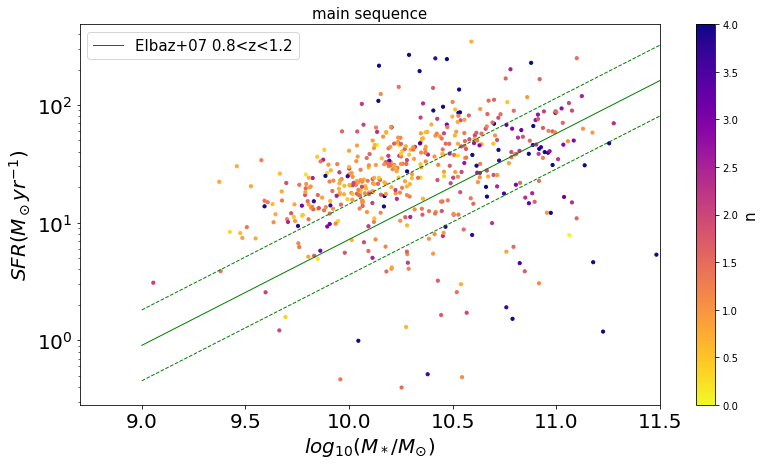

In [29]:
plt.figure(figsize=[13,7])
plt.plot(mm1,sfr1,color='green',linestyle='solid',linewidth='1',label='Elbaz+07 0.8<z<1.2')
plt.plot(mm2,sfr2,color='green',linestyle='dashed',linewidth='1')
plt.plot(mm3,sfr3,color='green',linestyle='dashed',linewidth='1')
plt.scatter(all_mass,all_sfr,c=all_n,s=10,marker='o',cmap='plasma_r',norm=Normalize(vmin=0,vmax=4))
cb = plt.colorbar()
cb.set_label('n',fontsize=15)
cb.ax.tick_params(labelsize=10)
plt.legend(loc=0,fontsize=15)
plt.yscale('log')
plt.xlim(8.7,11.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'main sequence',fontsize=15)
plt.xlabel('$log_{10}(M_*/M_{\odot})$',fontsize=20)
plt.ylabel('$SFR (M_\odot yr^{-1}$)',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/mainseq_n.pdf')

In [ ]:
normal_av = np.concatenate((normal1['MED_AV'],normal2['MED_AV'],normal3['MED_AV']),axis=0)
lirg_av = np.concatenate((lirg1['MED_AV'],lirg2['MED_AV'],lirg3['MED_AV']),axis=0)
ulirg_av = np.concatenate((ulirg1['MED_AV'],ulirg2['MED_AV'],ulirg3['MED_AV']),axis=0)

In [ ]:
normal_sfruv = np.concatenate((normal1['SFR_UV'],normal2['SFR_UV'],normal3['SFR_UV']),axis=0)
lirg_sfruv = np.concatenate((lirg1['SFR_UV'],lirg2['SFR_UV'],lirg3['SFR_UV']),axis=0)
ulirg_sfruv = np.concatenate((ulirg1['SFR_UV'],ulirg2['SFR_UV'],ulirg3['SFR_UV']),axis=0)

In [ ]:
normal_high_agn = np.concatenate((normal1['L4P5EX'][np.where(normal1['L4P5EX']/normal1['E4P5EX']>3)],normal2['MED_AV'][np.where(normal2['L4P5EX']/normal2['E4P5EX']>3)],normal3['MED_AV'][np.where(normal3['L4P5EX']/normal3['E4P5EX']>3)]),axis=0)
lirg_high_agn = np.concatenate((lirg1['L4P5EX'][np.where(lirg1['L4P5EX']/lirg1['E4P5EX']>3)],lirg2['MED_AV'][np.where(lirg2['L4P5EX']/lirg2['E4P5EX']>3)],lirg3['MED_AV'][np.where(lirg3['L4P5EX']/lirg3['E4P5EX']>3)]),axis=0)
ulirg_high_agn = np.concatenate((ulirg1['L4P5EX'][np.where(ulirg1['L4P5EX']/ulirg1['E4P5EX']>3)],ulirg2['MED_AV'][np.where(ulirg2['L4P5EX']/ulirg2['E4P5EX']>3)],ulirg3['MED_AV'][np.where(ulirg3['L4P5EX']/ulirg3['E4P5EX']>3)]),axis=0)
normal_high_agn_n = np.concatenate((normal1['n_f160w'][np.where(normal1['L4P5EX']/normal1['E4P5EX']>3)],normal2['n_f160w'][np.where(normal2['L4P5EX']/normal2['E4P5EX']>3)],normal3['n_f160w'][np.where(normal3['L4P5EX']/normal3['E4P5EX']>3)]),axis=0)
lirg_high_agn_n = np.concatenate((lirg1['n_f160w'][np.where(lirg1['L4P5EX']/lirg1['E4P5EX']>3)],lirg2['n_f160w'][np.where(lirg2['L4P5EX']/lirg2['E4P5EX']>3)],lirg3['n_f160w'][np.where(lirg3['L4P5EX']/lirg3['E4P5EX']>3)]),axis=0)
ulirg_high_agn_n = np.concatenate((ulirg1['n_f160w'][np.where(ulirg1['L4P5EX']/ulirg1['E4P5EX']>3)],ulirg2['n_f160w'][np.where(ulirg2['L4P5EX']/ulirg2['E4P5EX']>3)],ulirg3['n_f160w'][np.where(ulirg3['L4P5EX']/ulirg3['E4P5EX']>3)]),axis=0)

In [ ]:
plt.figure(figsize=[10,5])
plt.hist(np.concatenate((normal1['LIR_FULL'],normal2['LIR_FULL'],normal3['LIR_FULL'],lirg1['LIR_FULL'],lirg2['LIR_FULL'],lirg3['LIR_FULL'],ulirg1['LIR_FULL'],ulirg2['LIR_FULL'],ulirg3['LIR_FULL']),axis=0),bins=50,range=[10,12.5])
plt.xlim(10,12.5)

In [2]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
def dc(x,lambda0,m0):
    hz=np.sqrt(lambda0+m0*(1+x)**3)
    return 1/hz
H0=70 # km/s/Mpc, nowadays commonly used
Lambda0=0.7
M0=0.3
def kpc_per_arcsec(z):
    angular_distance=((3*10**5)/H0)*quad(dc,0,z,args=(Lambda0,M0))[0]/(1+z)
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)
from astropy.io import fits
import numpy as np
hdu1 = fits.open('/Users/lpr/Data/fits/expdata/HST/goodss_all/gds_Huang_van.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/fits/expdata/HST/goodsn_all/gdn_Huang_van.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/fits/expdata/HST/egs_all/egs_Huang_van.fits')[1].data
# Huang(2021) selected galaxies with 0.8<z<1.3
hdu1 = hdu1[np.where((hdu1['Separation']<0.3)&(hdu1['z_used']>0.8)&(hdu1['z_used']<1.3))]
hdu2 = hdu2[np.where((hdu2['Separation']<0.3)&(hdu2['z_used']>0.8)&(hdu2['z_used']<1.3))]
hdu3 = hdu3[np.where((hdu3['Separation']<0.3)&(hdu3['z_used']>0.8)&(hdu3['z_used']<1.3)&(hdu3['ID']!=-1))]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lpr/Data/fits/expdata/HST/goodss_all/gds_Huang_van.fits'

In [ ]:
agn1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 1)]
agn2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 1)]
agn3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 1)]
#agn2 = agn1[np.where(agn1['L4P5EX']/agn1['E4P5EX']>3)]
composite1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 2)]
composite2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 2)]
composite3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 2)]
sf1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 3)]
sf2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 3)]
sf3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 3)]
quiescent1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 4)]
quiescent2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 4)]
quiescent3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 4)]
blue_compact1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 5)]
blue_compact2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 5)]
blue_compact3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 5)]

In [ ]:
agn_n = np.concatenate((agn1['n_f160w'],agn2['n_f160w'],agn3['n_f160w']),axis=0)
composite_n = np.concatenate((composite1['n_f160w'],composite2['n_f160w'],composite3['n_f160w']),axis=0)
sf_n = np.concatenate((sf1['n_f160w'],sf2['n_f160w'],sf3['n_f160w']),axis=0)
blue_compact_n = np.concatenate((blue_compact1['n_f160w'],blue_compact2['n_f160w'],blue_compact3['n_f160w']),axis=0)

In [ ]:
d1=agn_n[np.where((agn_n<2))]
d2=composite_n[np.where((composite_n<2))]
d3=sf_n[np.where((sf_n<2))]
print(len(d1),len(d2),len(d3))
print(len(agn_n),len(composite_n),len(sf_n))
print(len(d1)/len(agn_n),len(d2)/len(composite_n),len(d3)/len(sf_n))

In [2]:
from astropy.io import fits
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
import matplotlib.colors as colors

In [3]:
import matplotlib.patches as mpatches
x_tail = 0.6
y_tail = 0.5
x_head = 1.0
y_head = 1.0
dx = x_head - x_tail
dy = y_head - y_tail
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),mutation_scale=100)
def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)

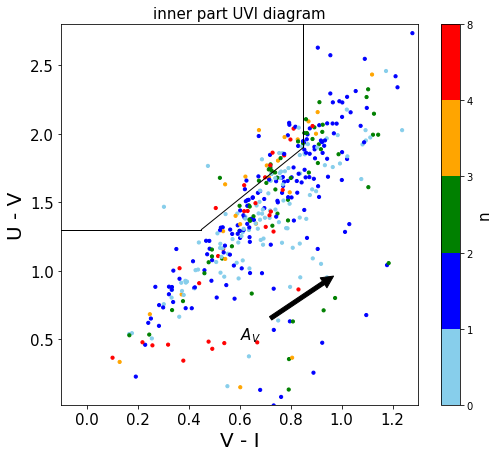

In [12]:
fields_list = ['goodsn','goodss','egs']
size_combine = 0
for field in fields_list:
    temp = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_uvi_res_CANDELS_c1_onlygdnfrac.fits')[1].data
    temp = temp[np.where((temp['z_used']<1.3)&(temp['z_used']>0.8)&(temp['ID_Huang']!=-1))]
    size_combine += temp.size
array_combine = np.full([size_combine,8],-999.)
size_combine = 0
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
for field in fields_list:
    uvi_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_uvi_res_CANDELS_c1_onlygdnfrac.fits')[1].data
    all_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_candels_radec_van.fits')[1].data
#     morph_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_morph.fits')[1].data
    uvi_catalog = uvi_catalog[np.where((uvi_catalog['z_used']<1.3)&(uvi_catalog['z_used']>0.8)&(uvi_catalog['ID_Huang']!=-1))]
    array = np.full([uvi_catalog.size,8],-999.)
    for num in range(0,uvi_catalog.size):
        idx = uvi_catalog[num]['ID_Huang']
        if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:# and morph_catalog[np.where(morph_catalog['ID']==idx)]['morph'] != -1:
            uv_bulge = uvi_catalog[num]['uv_bulge']
            uv_disk = uvi_catalog[num]['uv_disk']
            vi_bulge = uvi_catalog[num]['vi_bulge']
            vi_disk = uvi_catalog[num]['vi_disk']
            z = uvi_catalog[num]['z_used']
            gala_class = all_catalog[np.where(all_catalog['ID']==idx)]['TMP_CLASS'][0,0]
#             re = all_catalog[np.where(all_catalog['ID']==idx)]['re_f160w'][0]*kpc_per_arcsec(z)
            n = all_catalog[np.where(all_catalog['ID']==idx)]['n_f160w'][0] #morph_catalog[np.where(morph_catalog['ID']==idx)]['morph']# 
            array[num] = idx,uv_bulge,uv_disk,vi_bulge,vi_disk,z,n,gala_class
#     l_x = np.linspace(0.45,0.85,100)
#     l_y = 1.5*l_x+0.625
#     plt.figure(figsize=[8,7])
#     plt.scatter(array[:,3],array[:,1],s=10,c=array[:,6],cmap='plasma_r',norm=colors.Normalize(vmin=0,vmax=4))
#     plt.annotate(r'$A_V$',xy=(x_head,y_head),xytext=(x_tail,y_tail),arrowprops=dict(facecolor='black', shrink=0.1),fontsize=15)
#     plt.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
#     plt.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
#     plt.plot(l_x,l_y,color='green',linewidth=2)
#     plt.colorbar(extend='max')
#     plt.xlim(0,1.3)
#     plt.ylim(0.02,2.8)
#     plt.xlabel('V - I',fontsize=20)
#     plt.ylabel('U - V',fontsize=20)
#     plt.title(field)
#     plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/'+field+'_uvi_n_bulge_onlygdnfrac.pdf')
#     array_bluer = array[np.where((array[:,1]<0)|(array[:,2]<0)|(array[:,1]>2.5)|(array[:,2]>2.5)|(array[:,3]<-0.2)|(array[:,4]<-0.2)|(array[:,3]>1.2)|(array[:,4]>1.2))]
#     col = fits.Column(name='ID_compact_Huang',array=array_bluer[:,0],format='K')
#     hdu = fits.BinTableHDU.from_columns([col])
#     hdu.writeto('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_outside_box.fits',overwrite=True)
# #     save blue core to fits
#     array_bluer = array[np.where((array[:,1]-array[:,2]<-0.5)|(array[:,3]-array[:,4]<-0.5))]
#     col = fits.Column(name='ID_compact_Huang',array=array_bluer[:,0],format='K')
#     hdu = fits.BinTableHDU.from_columns([col])
#     hdu.writeto('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_bluer_sources.fits',overwrite=True)
    array_combine[size_combine:size_combine+uvi_catalog.size] = array
    size_combine += uvi_catalog.size

cmap = colors.ListedColormap(['skyblue','blue','green','orange','red'])
Norm_bound = colors.BoundaryNorm([0,1,2,3,4,8],cmap.N)
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
plt.figure(figsize=(8,7))
plt.scatter(array_combine[:,3],array_combine[:,1],s=10,c=array_combine[:,6],norm=Norm_bound,cmap=cmap)# plt.scatter(array_combine[:,3],array_combine[:,1],s=10,c=array_combine[:,6],cmap='rainbow',norm=colors.Normalize(vmin=1,vmax=4))
cb = plt.colorbar() #extend='both'
cb.set_label('n',fontsize=15)
plt.annotate(r'$A_V$',xy=(x_head,y_head),xytext=(x_tail,y_tail),arrowprops=dict(facecolor='black', shrink=0.1),fontsize=15)
plt.plot([-2,0.45],[1.3,1.3],color='black',linewidth=1)
plt.plot([0.85,0.85],[1.9,3],color='black',linewidth=1)
plt.plot(l_x,l_y,color='black',linewidth=1)
plt.xlim(-0.1,1.3)
plt.ylim(0.02,2.8)
plt.xlabel('V - I',fontsize=20)
plt.ylabel('U - V',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('inner part UVI diagram',fontsize=15)
plt.savefig('/Users/lpr/Documents/paper latex/uvi_inner.pdf')

In [ ]:
# plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/uvi_n_disk_rainbow.pdf')
# fig = plt.figure(figsize=(8,8))
# gs = fig.add_gridspec(2,2,width_ratios=(7,2),height_ratios=(2,7),left=0.1,right=0.9,bottom=0.1,top=0.9,wspace=0.05,hspace=0.05)
# ax = fig.add_subplot(gs[1, 0])
# ax.scatter(array_combine[:,3],array_combine[:,1],s=10,color='red')
# ax.scatter(array_combine[:,4],array_combine[:,2],s=10,color='blue')
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
# ax_histx.tick_params(axis="x", labelbottom=False)
# ax_histx.hist(array_combine[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[0,1.3])
# ax_histx.hist(array_combine[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[0,1.3])
# ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# ax_histy.tick_params(axis="y", labelleft=False)
# ax_histy.hist(array_combine[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0.01,2.8])
# ax_histy.hist(array_combine[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0.01,2.8])
# ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
# ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
# ax.plot(l_x,l_y,color='green',linewidth=2)
# ax.set_xlim(-0.1,1.3)
# ax.set_ylim(0.02,2.8)
# ax.set_xlabel('V - I',fontsize=20)
# ax.set_ylabel('U - V',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/UVI_diagram.pdf')

# find the points whose positions are lie in quiescent region
# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon
# quiescent_region = Polygon([(-0.1,1.3),(-0.1,2.8),(0.45,1.3),(0.85,1.9),(0.85,2.8)])

# for field in fields_list:
#     idx_list= []
#     uvi_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_uvi_res_CANDELS_c1.fits')[1].data
#     all_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_radec_candels.fits')[1].data
#     uvi_catalog = uvi_catalog[np.where((uvi_catalog['z_used']<1.3)&(uvi_catalog['z_used']>0.8)&(uvi_catalog['ID_Huang']!=-1))]
#     for num in range(0,uvi_catalog.size):
#         idx = uvi_catalog[num]['ID_Huang']
#         if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:
#             uv_bulge = uvi_catalog[num]['uv_bulge']
#             uv_disk = uvi_catalog[num]['uv_disk']
#             vi_bulge = uvi_catalog[num]['vi_bulge']
#             vi_disk = uvi_catalog[num]['vi_disk']
#             if quiescent_region.contains(Point(vi_bulge,uv_bulge)) or quiescent_region.contains(Point(vi_disk,uv_disk)):
#             idx_list.append(idx)
#     idx_list = np.array(idx_list)
#     col = fits.Column(name='ID_Huang',array=idx_list,format='K')
#     hdu = fits.BinTableHDU.from_columns([col])
#     hdu.writeto('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_quiescent_sources.fits',overwrite=True)
# l_x = np.linspace(0.45,0.85,100)
# l_y = 1.5*l_x+0.625
# fig = plt.figure(figsize=(8,8))
# gs = fig.add_gridspec(2,2,width_ratios=(7,2),height_ratios=(2,7),left=0.1,right=0.9,bottom=0.1,top=0.9,wspace=0.05,hspace=0.05)
# ax = fig.add_subplot(gs[1, 0])
# ax.scatter(array[:,3],array[:,1],s=10,color='red')
# ax.scatter(array[:,4],array[:,2],s=10,color='blue')
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
# ax_histx.tick_params(axis="x", labelbottom=False)
# ax_histx.hist(array[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[0,1.3])
# ax_histx.hist(array[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[0,1.3])
# ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# ax_histy.tick_params(axis="y", labelleft=False)
# if field == 'goodsn':
#     ax_histy.hist(array[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,3])
#     ax_histy.hist(array[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,3])
# else:
#     ax_histy.hist(array[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,2.5])
#     ax_histy.hist(array[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,2.5])
# ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
# ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
# ax.plot(l_x,l_y,color='green',linewidth=2)
# ax.set_xlim(0,1.3)
# if field == 'goodsn':
#     ax.set_ylim(0.01,3)
# else:
#     ax.set_ylim(0.01,2.5)
# ax.set_xlabel('V - I',fontsize=20)
# ax.set_ylabel('U - V',fontsize=20)
# # ax.tick_params(labelsize=20)
# print(field)
# plt.savefig('/Users/lpr/Documents/paper latex/screenshot/UVI_'+field+'.pdf')

In [57]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
quiescent_region = Polygon([(-0.1,1.3),(0.45,1.3),(0.85,1.9),(0.85,2.8),(-0.1,2.8)])
# bottom_right=Polygon([(0.23,0),(1.3,0),(1.3,2.0)])
idx_list= []
morph_list = []
for field in fields_list:
    uvi_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_uvi_res_CANDELS_c1_useauto.fits')[1].data
    all_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_radec_candels.fits')[1].data
    uvi_catalog = uvi_catalog[np.where((uvi_catalog['z_used']<1.3)&(uvi_catalog['z_used']>0.8)&(uvi_catalog['ID_Huang']!=-1))]
    morph_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_morph.fits')[1].data
    for num in range(0,uvi_catalog.size):
        idx = uvi_catalog[num]['ID_Huang']
        if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:
            uv_bulge = uvi_catalog[num]['uv_bulge']
            uv_disk = uvi_catalog[num]['uv_disk']
            vi_bulge = uvi_catalog[num]['vi_bulge']
            vi_disk = uvi_catalog[num]['vi_disk']
            if quiescent_region.contains(Point(vi_disk,uv_disk)):# or quiescent_region.contains(Point(vi_disk,uv_disk)):
                idx_list.append(idx)
                morph_list.append(morph_catalog[np.where(morph_catalog['ID']==idx)]['morph'])
idx_list=np.array(idx_list)
morph_list=np.array(morph_list)
# col=fits.Column(name='id',array=idx_list,format='K')
# hdu=fits.BinTableHDU.from_columns([col])
# hdu.writeto('/Users/lpr/Data/lirg_project/output/catalog/bulge_quie.fits')

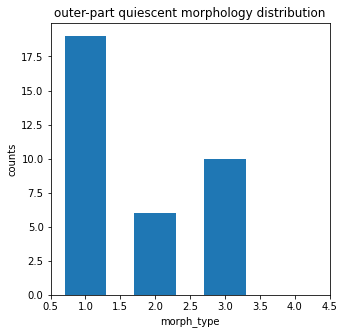

In [58]:
plt.figure(figsize=[5,5])
plt.hist(morph_list,bins=[-1.1,0.5,1.5,2.5,3.5,4.5],rwidth=0.6)
plt.xlim(0.5,4.5)
plt.ylabel('counts')
plt.xlabel('morph_type')
plt.title('outer-part quiescent morphology distribution')
plt.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/outer_quiescent_morph.png')

In [52]:
len(idx_list)

40

In [53]:
whole_region = Polygon([(-0.1,0),(1.25,0),(1.25,2.8),(-0.1,2.8)])
idx_list= []
for field in fields_list:
    uvi_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_uvi_res_CANDELS_c1_useauto.fits')[1].data
    all_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_radec_candels.fits')[1].data
    uvi_catalog = uvi_catalog[np.where((uvi_catalog['z_used']<1.3)&(uvi_catalog['z_used']>0.8)&(uvi_catalog['ID_Huang']!=-1))]
    for num in range(0,uvi_catalog.size):
        idx = uvi_catalog[num]['ID_Huang']
        if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:
            uv_bulge = uvi_catalog[num]['uv_bulge']
            uv_disk = uvi_catalog[num]['uv_disk']
            vi_bulge = uvi_catalog[num]['vi_bulge']
            vi_disk = uvi_catalog[num]['vi_disk']
            if whole_region.contains(Point(vi_disk,uv_disk)):# or whole_region.contains(Point(vi_disk,uv_disk)):
                idx_list.append(idx)

In [54]:
len(idx_list)

414

In [12]:
re_list= []
n_list=[]
l45ex_list=[]
tmp_class=[]
for field in fields_list:
    all_catalog = fits.open('/Users/lpr/Data/lirg_project/output/catalog/'+field+'_Huangall_candels_radec_van.fits')[1].data
    for num in range(0,idx_list.size):
        idx = idx_list[num]
        if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:
            re=all_catalog[np.where(all_catalog['ID']==idx)]['re_f160w'][0]*kpc_per_arcsec(z)
            n=all_catalog[np.where(all_catalog['ID']==idx)]['n_f160w']
            l45ex=all_catalog[np.where(all_catalog['ID']==idx)]['L4P5EX']
            re_list.append(re)
            n_list.append(n)
            l45ex_list.append(l45ex)
re_list = np.array(re_list)
n_list=np.array(n_list)
l45ex_list=np.array(l45ex_list)

<ipython-input-12-00c0bb0c5d5d>:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if all_catalog[np.where(all_catalog['ID']==idx)]['Separation_CANDELS_16']<1:


In [15]:
print(len(re_list[np.where(re_list>4)]))
print(len(n_list[np.where(n_list>2)]))
print(idx_list.size)
# np.sort(n_list[:,0])
# print(np.sort(l45ex_list[:,0]))

10
11
27


In [18]:
hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodsn_uvi_res_CANDELS_c1.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodss_uvi_res_CANDELS_c1.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/egs_uvi_res_CANDELS_c1.fits')[1].data
print(hdu1[np.where((hdu1['uv_disk']>1.3)&(hdu1['vi_disk']<0.5)&(hdu1['uv_disk']<2.8)&(hdu1['vi_disk']>-0.1))]['ID_Huang'])
print(hdu2[np.where((hdu2['uv_disk']>1.3)&(hdu2['vi_disk']<0.5)&(hdu2['uv_disk']<2.8)&(hdu2['vi_disk']>-0.1))]['ID_Huang'])
print(hdu3[np.where((hdu3['uv_disk']>1.3)&(hdu3['vi_disk']<0.5)&(hdu3['uv_disk']<2.8)&(hdu3['vi_disk']>-0.1))]['ID_Huang'])
print(hdu1.columns)

ColDefs(
    name = 'L4P5EX'; format = 'E'
    name = 'E4P5EX'; format = 'E'
    name = 'L8SFR'; format = 'E'
    name = 'E8SFR'; format = 'E'
    name = 'FRAC24AGN'; format = 'E'
    name = 'LMASS'; format = 'E'
    name = 'SSFR_UV_CORR'; format = 'E'
    name = 'MED_AV'; format = 'E'
    name = 'SFR_UV'; format = 'E'
    name = 'ZSPEC1'; format = 'E'
    name = 'ZSPEC2'; format = 'E'
    name = 'ZQ'; format = 'I'
    name = 'ZBEST1'; format = 'E'
    name = 'ZBEST2'; format = 'E'
    name = 'LUV'; format = 'E'
    name = 'ID'; format = 'J'
    name = 'RA_16'; format = 'D'
    name = 'DEC_16'; format = 'D'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'NFIR'; format = 'E'
    name = 'LFIR_FULL'; format = 'E'
    name = 'LIR_FULL'; format = 'E'
    name = 'LTIR_FULL'; format = 'E'
    name = 'LMIR_FULL'; format = 'E'
    name = 'LFIR_LONG'; format = 'E'
    name = 'LIR_LONG'; format = 'E'
    name = 'LTIR_LONG'; format = 'E'
    name = 'LERR_FULL'; format = 'E

In [5]:
ind1 = np.where((array[:,5]<1.)&(array[:,5]>0.8))
array_left1 = array[ind1]
ind2 = np.where((array[:,5]<1.3)&(array[:,5]>1))
array_right1 = array[ind2]

Text(0, 0.5, 'U - V')

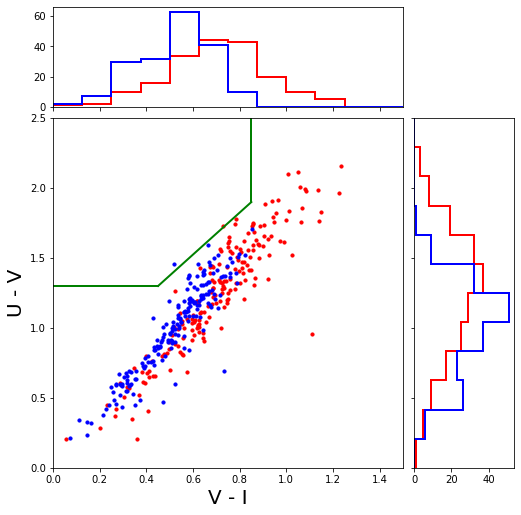

In [6]:
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_left1[:,3],array_left1[:,1],s=10,color='red')
ax.scatter(array_left1[:,4],array_left1[:,2],s=10,color='blue')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_left1[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[0,1.5])
ax_histx.hist(array_left1[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[0,1.5])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_left1[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,2.5])
ax_histy.hist(array_left1[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,2.5])
ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
ax.plot(l_x,l_y,color='green',linewidth=2)
ax.set_xlim(0,1.5)
ax.set_ylim(0,2.5)
ax.set_xlabel('V - I',fontsize=20)
ax.set_ylabel('U - V',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Desktop/screenshot/UVI_res_left1_specific_filter_corrected.pdf')

Text(0, 0.5, 'U - V')

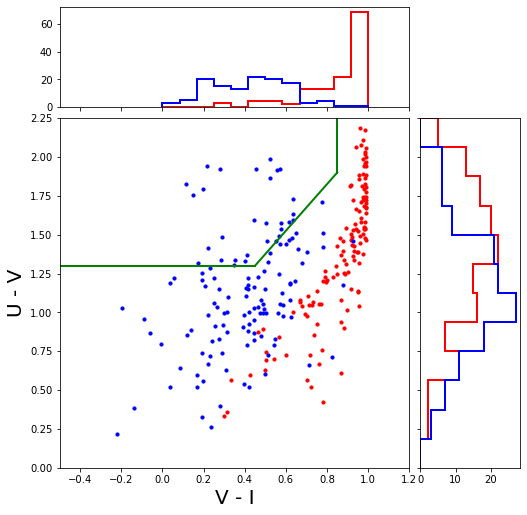

In [9]:
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_right1[:,3],array_right1[:,1],s=10,color='red')
ax.scatter(array_right1[:,4],array_right1[:,2],s=10,color='blue')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_right1[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[0.,1])#[-0.25,1.25]
ax_histx.hist(array_right1[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[0.,1])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_right1[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,2.25])
ax_histy.hist(array_right1[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,2.25])
ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
ax.plot(l_x,l_y,color='green',linewidth=2)
ax.set_xlim(-0.5,1.2)
ax.set_ylim(0,2.25)
ax.set_xlabel('V - I',fontsize=20)
ax.set_ylabel('U - V',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Desktop/screenshot/UVI_res_right1_specific_filter_corrected.pdf')

Text(0, 0.5, '$\\Delta(U - V)$')

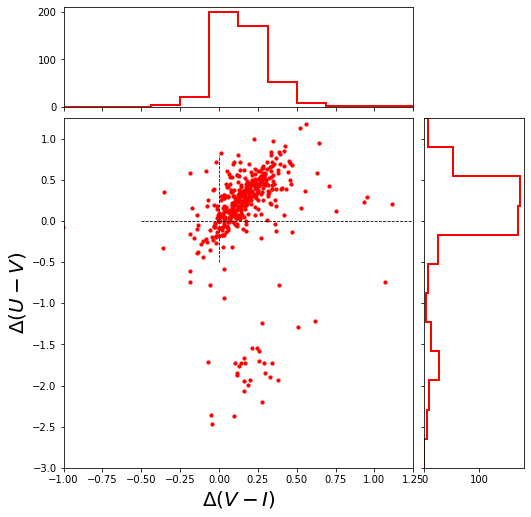

In [19]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_combine[:,3]-array_combine[:,4],array_combine[:,1]-array_combine[:,2],s=10,color='red')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_combine[:,3]-array_combine[:,4],bins=12,linewidth=2,histtype='step',color='red',range=[-1,1.25])#)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_combine[:,1]-array_combine[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[-3,1.25])#)
ax.set_xlim(-1,1.25)
ax.set_ylim(-3,1.25)
ax.plot([0,0],[-0.5,0.8],color='black',linewidth=0.8,linestyle='--')
ax.plot([-0.5,2],[0,0],color='black',linewidth=0.8,linestyle='--')
ax.set_xlabel('$\Delta(V - I)$',fontsize=20)
ax.set_ylabel('$\Delta(U - V)$',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/delta_uvi.pdf')

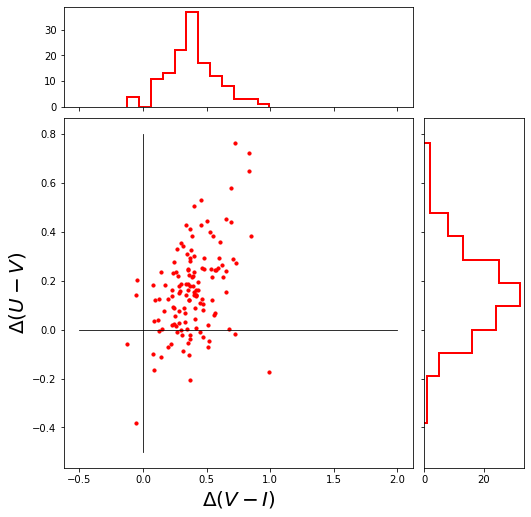

In [14]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_right1[:,3]-array_right1[:,4],array_right1[:,1]-array_right1[:,2],s=10,color='red')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_right1[:,3]-array_right1[:,4],bins=12,linewidth=2,histtype='step',color='red')#,range=[-0.25,1.25])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_right1[:,1]-array_right1[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red')#,range=[0,2.5])
# ax.set_xlim(-0.25,1.25)
# ax.set_ylim(0,2.5)
ax.plot([0,0],[-0.5,0.8],color='black',linewidth=0.8)
ax.plot([-0.5,2],[0,0],color='black',linewidth=0.8)
ax.set_xlabel('$\Delta(V - I)$',fontsize=20)
ax.set_ylabel('$\Delta(U - V)$',fontsize=20)
# ax.tick_params(labelsize=20)
plt.savefig('/Users/lpr/Desktop/screenshot/UVI_res_right1_specific_filter_delta.pdf')

In [23]:
restcolor = fits.open('/Users/lpr/Data/fits/expdata/HST/goodsn_all/uvi/uvi_res_fit_CANDELS.fits')[1].data
array = np.full([restcolor.size,6],-999.)
for num in range(0,restcolor.size):
    idx = restcolor[num]['ID_Huang']
    uv_bulge = restcolor[num]['uv_bulge']
    uv_disk = restcolor[num]['uv_disk']
    vi_bulge = restcolor[num]['vi_bulge']
    vi_disk = restcolor[num]['vi_disk']
    z = restcolor[num]['z_used']
    array[num] = idx,uv_bulge,uv_disk,vi_bulge,vi_disk,z
ind1 = np.where((array[:,5]<1.)&(array[:,5]>0.8))
array_left1 = array[ind1]
ind2 = np.where((array[:,5]<1.3)&(array[:,5]>1))
array_right1 = array[ind2]

Text(0, 0.5, 'U - V')

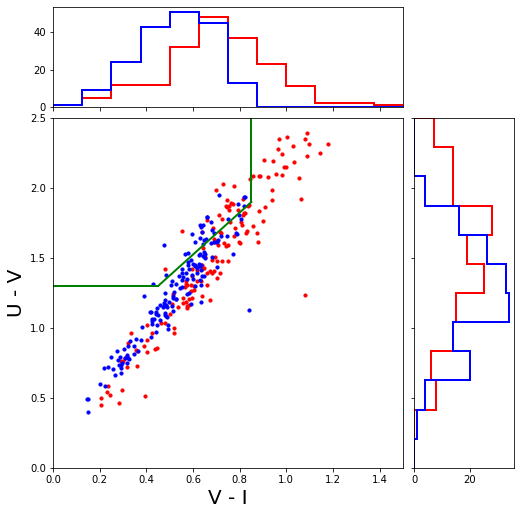

In [24]:
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_left1[:,3],array_left1[:,1],s=10,color='red')
ax.scatter(array_left1[:,4],array_left1[:,2],s=10,color='blue')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_left1[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[0,1.5])
ax_histx.hist(array_left1[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[0,1.5])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_left1[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,2.5])
ax_histy.hist(array_left1[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,2.5])
ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
ax.plot(l_x,l_y,color='green',linewidth=2)
ax.set_xlim(0,1.5)
ax.set_ylim(0,2.5)
ax.set_xlabel('V - I',fontsize=20)
ax.set_ylabel('U - V',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Desktop/screenshot/UVI_res_left1_specific_filter_corrected.pdf')

Text(0, 0.5, 'U - V')

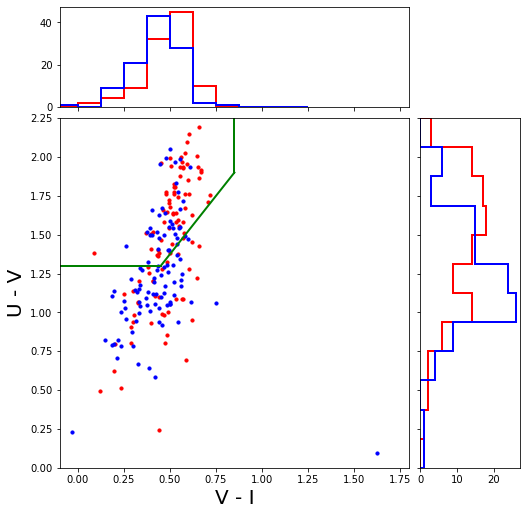

In [28]:
l_x = np.linspace(0.45,0.85,100)
l_y = 1.5*l_x+0.625
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7,2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(array_right1[:,3],array_right1[:,1],s=10,color='red')
ax.scatter(array_right1[:,4],array_right1[:,2],s=10,color='blue')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(array_right1[:,3],bins=12,linewidth=2,histtype='step',color='red',range=[-0.25,1.25])
ax_histx.hist(array_right1[:,4],bins=12,linewidth=2,histtype='step',color='blue',range=[-0.25,1.25])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(array_right1[:,1],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='red',range=[0,2.25])
ax_histy.hist(array_right1[:,2],bins=12,orientation='horizontal',linewidth=2,histtype='step',color='blue',range=[0,2.25])
ax.plot([-2,0.45],[1.3,1.3],color='green',linewidth=2)
ax.plot([0.85,0.85],[1.9,3],color='green',linewidth=2)
ax.plot(l_x,l_y,color='green',linewidth=2)
ax.set_xlim(-0.1,1.8)# ax.set_xlim(0.25,1.8)
ax.set_ylim(0,2.25)# ax.set_ylim(-1,2.25)
ax.set_xlabel('V - I',fontsize=20)
ax.set_ylabel('U - V',fontsize=20)
# ax.tick_params(labelsize=20)
# plt.savefig('/Users/lpr/Desktop/screenshot/UVI_res_right1_specific_filter_corrected.pdf')

In [ ]:
ind1 = np.where(np.log10(10**hdu1['LMASS']/hdu1['re_f160w']**1.5)>=10.4)
ind2 = np.where(np.log10(10**hdu2['LMASS']/hdu2['re_f160w']**1.5)>=10.4)
ind3 = np.where(np.log10(10**hdu3['LMASS']/hdu3['re_f160w']**1.5)>=10.4)
array1 = hdu1[ind1]['ID']
array2 = hdu2[ind2]['ID']
array3 = hdu3[ind3]['ID']
print(array1,array2,array3)
col1 = fits.Column(name='ID_compact_Huang',array=array1,format='K')
hdu1 = fits.BinTableHDU.from_columns([col1])
hdu1.writeto('/Users/lpr/Data/lirg_project/output/catalog/goodss_compact_sources.fits',overwrite=True)
col2 = fits.Column(name='ID_compact_Huang',array=array2,format='K')
hdu2 = fits.BinTableHDU.from_columns([col2])
hdu2.writeto('/Users/lpr/Data/lirg_project/output/catalog/goodsn_compact_sources.fits',overwrite=True)
# col3 = fits.Column(name='ID_compact_Huang',array=array3,format='K')
# hdu3 = fits.BinTableHDU.from_columns([col3])
# hdu.writeto('/Users/lpr/Data/lirg_project/output/catalog/egs_compact_sources.fits',overwrite=True)

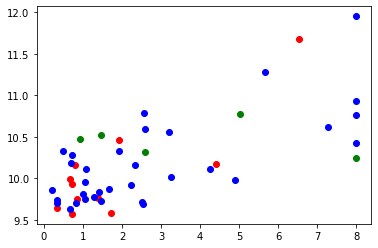

In [13]:
plt.scatter(hdu1[np.where((hdu1['TMP_CLASS'][:,0]==1)&(hdu1['L4P5EX']>=10**9.5))]['n_f160w'],np.log10(hdu1[np.where((hdu1['TMP_CLASS'][:,0]==1)&(hdu1['L4P5EX']>=10**9.5))]['L4P5EX']),color='red')
plt.scatter(hdu2[np.where((hdu2['TMP_CLASS'][:,0]==1)&(hdu2['L4P5EX']>=10**9.5))]['n_f160w'],np.log10(hdu2[np.where((hdu2['TMP_CLASS'][:,0]==1)&(hdu2['L4P5EX']>=10**9.5))]['L4P5EX']),color='blue')
plt.scatter(hdu3[np.where((hdu3['TMP_CLASS'][:,0]==1)&(hdu3['L4P5EX']>=10**9.5))]['n_f160w'],np.log10(hdu3[np.where((hdu3['TMP_CLASS'][:,0]==1)&(hdu3['L4P5EX']>=10**9.5))]['L4P5EX']),color='green')

In [17]:
print(hdu1[np.where((hdu1['n_f160w']>=4)&(hdu1['re_f160w']>=4)&(hdu1['re_f160w']<=14))]['ID'])
print(hdu2[np.where((hdu2['n_f160w']>=4)&(hdu2['re_f160w']>=4)&(hdu2['re_f160w']<=14))]['ID'])
print(hdu3[np.where((hdu3['n_f160w']>=4)&(hdu3['re_f160w']>=4)&(hdu3['re_f160w']<=14))]['ID'])

[11955]
[32419 15995 33322 23486 10534 29082  5383 36636 35739 23623 34172]
[12024493]


In [1]:
from astropy.io import fits
import numpy as np
from astropy.cosmology import FlatLambdaCDM as flcdm
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import ndimage
from scipy import stats
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

In [2]:
hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/goodsn_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/goodss_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/egs_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data

hdu1_id = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog_radec/goodsn_id.fits',1)
hdu2_id = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog_radec/goodss_id.fits',1)
hdu3_id = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog_radec/egs_id.fits',1)
hdu1 = hdu1[np.isin(hdu1['id'],hdu1_id['id'])]
hdu2 = hdu2[np.isin(hdu2['id'],hdu2_id['id'])]
hdu3 = hdu3[np.isin(hdu3['id'],hdu3_id['id'])]

In [3]:
hdu1_re = fits.getdata('/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/goodsn_re_hlr.fits',1)
hdu2_re = fits.getdata('/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/goodss_re_hlr.fits',1)
hdu3_re = fits.getdata('/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/egs_re_hlr.fits',1)

In [4]:
def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)

In [10]:
hdu1_candels=fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/gdn_all_covermatch.fits')[1].data
hdu2_candels=fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/gds_all_vanmatch.fits')[1].data
hdu3_candels=fits.open('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/egs_all_covermatch.fits')[1].data
hdu1_candels_copy = hdu1_candels[np.where((hdu1_candels['zbest']>=0.8)&(hdu1_candels['zbest']<=1.3)&(hdu1_candels['CLASS_STAR']<0.5)&(hdu1_candels['m_med']>=9.5)&(hdu1_candels['m_med']<=11.5))]
hdu2_candels_copy = hdu2_candels[np.where((hdu2_candels['zbest']>=0.8)&(hdu2_candels['zbest']<=1.3)&(hdu2_candels['CLASS_STAR']<0.5)&(hdu2_candels['m_med']>=9.5)&(hdu2_candels['m_med']<=11.5))]
hdu3_candels_copy = hdu3_candels[np.where((hdu3_candels['zbest']>=0.8)&(hdu3_candels['zbest']<=1.3)&(hdu3_candels['CLASS_STAR']<0.5)&(hdu3_candels['m_med']>=9.5)&(hdu3_candels['m_med']<=11.5))]

In [11]:
for num1 in range(0,len(hdu1_candels_copy)):
    hdu1_candels_copy[num1]['re_f160w'] = hdu1_candels_copy[num1]['re_f160w']*kpc_per_arcsec(hdu1_candels_copy[num1]['zbest'])
for num2 in range(0,len(hdu2_candels_copy)):
    hdu2_candels_copy[num2]['re_f160w'] = hdu2_candels_copy[num2]['re_f160w']*kpc_per_arcsec(hdu2_candels_copy[num2]['zbest'])
for num3 in range(0,len(hdu3_candels_copy)):
    hdu3_candels_copy[num3]['re_f160w'] = hdu3_candels_copy[num3]['re_f160w']*kpc_per_arcsec(hdu3_candels_copy[num3]['zbest'])

In [12]:
# re_can = np.concatenate((hdu1_candels_copy['re_f160w'],hdu3_candels_copy['re_f160w']),axis=0)
# logsfr_can = np.concatenate((np.log10(10**hdu1_candels_copy['ssfr_uv_corr']*10**hdu1_candels_copy['m_med']/1.06),np.log10(10**hdu3_candels_copy['ssfr_uv_corr']*10**hdu3_candels_copy['m_med']/1.06)),axis=0)
re_can = []
logsfr_can = []
for num1 in range(0,len(hdu1_candels_copy)):
    id_can = hdu1_candels_copy[num1]['id']
    if id_can not in hdu1['id_candels']:
        re_can.append(hdu1_candels_copy[num1]['re_f160w'])
        logsfr_can.append(np.log10(10**hdu1_candels_copy[num1]['ssfr_uv_corr']*10**hdu1_candels_copy[num1]['m_med']/1.06))
for num1 in range(0,len(hdu3_candels_copy)):
    id_can = hdu3_candels_copy[num1]['id']
    if id_can not in hdu3['id_candels']:
        re_can.append(hdu3_candels_copy[num1]['re_f160w'])
        logsfr_can.append(np.log10(10**hdu3_candels_copy[num1]['ssfr_uv_corr']*10**hdu3_candels_copy[num1]['m_med']/1.06))
re_can = np.array(re_can)
logsfr_can = np.array(logsfr_can)
h,xedges,yedges=np.histogram2d(re_can,logsfr_can,range=np.array([[0,15.],[0,3.]]),bins=np.array([20,20]))
# here to define the contour of 90% CANDELS data
percent = 0.89
temp = np.sort(h.flatten())[::-1]
count = np.sum(temp)
temp2 = 0
for num1 in range(0,len(temp)):
    temp2 += temp[num1]
    if temp2 > percent * count:
        break
cut1,pert1 = [temp[num1-1],(temp2-temp[num1])/count]
cut2,pert2 = [temp[num1],temp2/count]
f = interp1d([pert1,pert2],[cut1,cut2])
level_want = f(percent)

In [13]:
data = ndimage.zoom(h,[3,5])
x,y = np.linspace(xedges[0],xedges[-1],data.shape[0]),np.linspace(yedges[0],yedges[-1],data.shape[1])

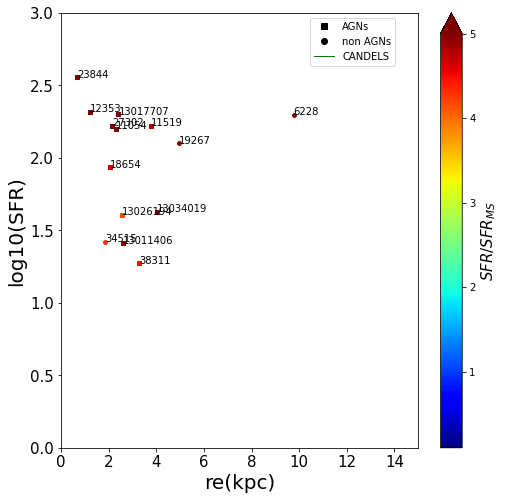

In [6]:
from matplotlib.lines import Line2D
smallagn = []
fastpath = []
symbols={1:'s',2:'o',3:'o',5:'o'}
plt.figure(figsize=[8,8])
# contour = plt.contour(x,y,data.T,levels=[float(level_want)],colors=['green'])
# plt.clabel(contour,contour.levels,inline=True,fontsize=8,fmt={1:'100%',float(level_want):'90%'},use_clabeltext=True,inline_spacing=0)
count = 0
# for num1 in range(0,len(hdu1_candels_copy)):
#     n = hdu1_candels_copy[num1]['n_f160w']
#     id_can = hdu1_candels_copy[num1]['id']
# for num1 in range(0,len(hdu3_candels_copy)):
#     n = hdu3_candels_copy[num1]['n_f160w']
#     id_can = hdu3_candels_copy[num1]['id']
for num2 in range(0,len(hdu1)):
    idx=hdu1[num2]['id']
    logsfr=np.log10(hdu1[num2]['sfr_huang'])
    tmp_class=hdu1[num2]['tmp_class'][0]
    z = hdu1[num2]['z_used']
    m = hdu1[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu1_re[hdu1_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS >4:
        fastpath.append(idx)
        plt.scatter(re,logsfr,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
        plt.text(re,logsfr,str(idx))
for num2 in range(0,len(hdu2)):
    idx=hdu2[num2]['id']
    logsfr=np.log10(hdu2[num2]['sfr_huang'])
    tmp_class=hdu2[num2]['tmp_class'][0]
    z = hdu2[num2]['z_used']
    m = hdu2[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu2_re[hdu2_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS >4:
        fastpath.append(idx)
        plt.scatter(re,logsfr,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
        plt.text(re,logsfr,str(idx))
for num2 in range(0,len(hdu3)):
    idx=hdu3[num2]['id']
    logsfr=np.log10(hdu3[num2]['sfr_huang'])
    tmp_class=hdu3[num2]['tmp_class'][0]
    z = hdu3[num2]['z_used']
    m = hdu3[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu3_re[hdu3_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS >4:
        fastpath.append(idx)
        plt.scatter(re,logsfr,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
        plt.text(re,logsfr,str(idx))
plt.xlim(0,15)
plt.ylim(0,3)
plt.ylabel('log10(SFR)',fontsize=20)
plt.xlabel('re(kpc)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cb = plt.colorbar(extend='max')#
cb.set_label('$SFR/SFR_{MS}$',fontsize=15)#
cb.ax.tick_params(labelsize=10)
legend_elements=[Line2D([0],[0],lw=0,marker='s',label=r'AGNs',color='black'),Line2D([0],[0],lw=0,marker='o',color='black',label=r'non AGNs'),Line2D([0],[0],lw=1,color='green',label=r'CANDELS')]
plt.legend(handles=legend_elements,fontsize=10,bbox_to_anchor=[0.95,1])
# plt.savefig('/Users/lpr/Data/lirg_project/output/images/resfr_radec_del_candels_MScoded.pdf')

In [41]:
smallagn
# fastpath

[11054, 19267, 11519, 23844, 27302, 12353, 13017707, 13004291]

<ipython-input-35-be22209b663c>:16: RuntimeWarning: divide by zero encountered in log10
  l4p5ex = np.log10(hdu1[num2]['l4p5ex'])
<ipython-input-35-be22209b663c>:39: RuntimeWarning: divide by zero encountered in log10
  l4p5ex = np.log10(hdu2[num2]['l4p5ex'])
<ipython-input-35-be22209b663c>:62: RuntimeWarning: divide by zero encountered in log10
  l4p5ex = np.log10(hdu3[num2]['l4p5ex'])


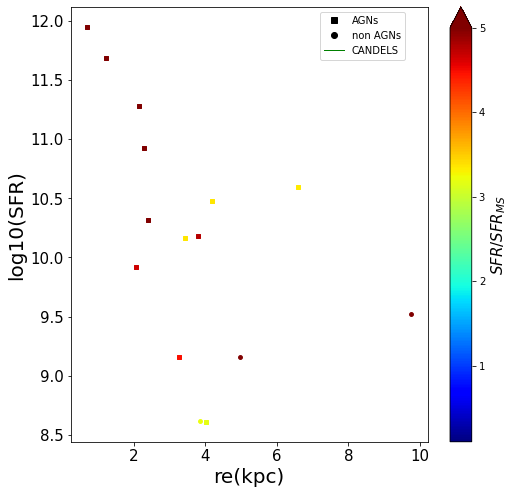

In [35]:
from matplotlib.lines import Line2D
smallagn = []
symbols={1:'s',2:'o',3:'o',5:'o'}
plt.figure(figsize=[8,8])
# contour = plt.contour(x,y,data.T,levels=[float(level_want)],colors=['green'])
# plt.clabel(contour,contour.levels,inline=True,fontsize=8,fmt={1:'100%',float(level_want):'90%'},use_clabeltext=True,inline_spacing=0)
count = 0
for num1 in range(0,len(hdu1_candels_copy)):
    n = hdu1_candels_copy[num1]['n_f160w']
    id_can = hdu1_candels_copy[num1]['id']
for num1 in range(0,len(hdu3_candels_copy)):
    n = hdu3_candels_copy[num1]['n_f160w']
    id_can = hdu3_candels_copy[num1]['id']
for num2 in range(0,len(hdu1)):
    idx=hdu1[num2]['id']
    l4p5ex = np.log10(hdu1[num2]['l4p5ex'])
    logsfr = np.log10(hdu1[num2]['sfr_huang'])
    tmp_class=hdu1[num2]['tmp_class'][0]
    z = hdu1[num2]['z_used']
    m = hdu1[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    if hdu1_re[hdu1_re['id']==idx]['n_f160w'][0] != -99.:
        n=hdu1_re[hdu1_re['id']==idx]['n_f160w'][0]
    else:
        n=hdu1[num2]['n_f160w']
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu1_re[hdu1_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS > 3:#tmp_class ==1
        plt.scatter(re,l4p5ex,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
for num2 in range(0,len(hdu2)):
    idx=hdu2[num2]['id']
    l4p5ex = np.log10(hdu2[num2]['l4p5ex'])
    logsfr = np.log10(hdu2[num2]['sfr_huang'])
    tmp_class=hdu2[num2]['tmp_class'][0]
    z = hdu2[num2]['z_used']
    m = hdu2[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    if hdu2_re[hdu2_re['id']==idx]['n_f160w'][0] != -99.:
        n=hdu2_re[hdu2_re['id']==idx]['n_f160w'][0]
    else:
        n=hdu2[num2]['n_f160w']
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu2_re[hdu2_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS > 3:#tmp_class ==1
        plt.scatter(re,l4p5ex,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
for num2 in range(0,len(hdu3)):
    idx=hdu3[num2]['id']
    l4p5ex = np.log10(hdu3[num2]['l4p5ex'])
    logsfr = np.log10(hdu3[num2]['sfr_huang'])
    tmp_class=hdu3[num2]['tmp_class'][0]
    z = hdu3[num2]['z_used']
    m = hdu3[num2]['lmass_candels']
    if z>0.78 and z<=0.93:
        s0,m0,gama = [1.35,9.96,1.28]
    elif z>0.93 and z<=1.11:
        s0,m0,gama = [1.53,10.1,1.26]
    elif z>1.11 and z<=1.3:
        s0,m0,gama = [1.72,10.31,1.07]
    if hdu3_re[hdu3_re['id']==idx]['n_f160w'][0] != -99.:
        n=hdu3_re[hdu3_re['id']==idx]['n_f160w'][0]
    else:
        n=hdu3[num2]['n_f160w']
    deltaMS = 10**(logsfr-(s0-np.log10(1+(10**m/10**m0)**(-1*gama))))
    re=hdu3_re[hdu3_re['id']==idx]['re'][0]*kpc_per_arcsec(z)
    if logsfr > 2 and re <6:
        smallagn.append(idx)
    if deltaMS > 3:#tmp_class ==1
        plt.scatter(re,l4p5ex,marker=symbols[tmp_class],s=15,c=deltaMS,cmap='jet',vmin=0.1,vmax=5)
# plt.xlim(0,15)
# plt.ylim(0,3)
plt.ylabel('log10(SFR)',fontsize=20)
plt.xlabel('re(kpc)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cb = plt.colorbar(extend='max')#
cb.set_label('$SFR/SFR_{MS}$',fontsize=15)#
cb.ax.tick_params(labelsize=10)
legend_elements=[Line2D([0],[0],lw=0,marker='s',label=r'AGNs',color='black'),Line2D([0],[0],lw=0,marker='o',color='black',label=r'non AGNs'),Line2D([0],[0],lw=1,color='green',label=r'CANDELS')]
plt.legend(handles=legend_elements,fontsize=10,bbox_to_anchor=[0.95,1])
# plt.savefig('/Users/lpr/Data/lirg_project/output/images/resfr_radec_del_candels_MScoded.pdf')

In [ ]:
plt.subplot(3,1,1)
plt.hist(hdu1['mag_f160w'],range=[18,26])
plt.subplot(3,1,2)
plt.hist(hdu2['mag_f160w'],range=[18,26])
plt.subplot(3,1,3)
plt.hist(hdu3['mag_f160w'],range=[18,26])
# print((len(hdu1[hdu1['mag_f160w']<25])+len(hdu2[hdu2['mag_f160w']<25])+len(hdu3[hdu3['mag_f160w']<25]))/(len(hdu1)+len(hdu2)+len(hdu3)))
# h1 = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog/goodsn_giniM20_statmorph.fits',1)
# h2 = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog/goodss_giniM20_statmorph.fits',1)
# h3 = fits.getdata('/Users/lpr/Data/lirg_project/output/catalog/egs_giniM20_statmorph.fits',1)
# count_merger = 0
# plt.figure(figsize=[5,5])
# for num in range(0,len(h1)):
#     idx = h1[num]['id']
#     m20 = h1[num]['moment_20']
#     gini = h1[num]['gini_coeff']
#     if gini >= -0.14 * m20 + 0.33:
#         plt.scatter(hdu1[hdu1['id']==idx]['lmass_candels'],hdu1[hdu1['id']==idx]['sfr_huang'],color='red',s=3)
#     else:
#         plt.scatter(hdu1[hdu1['id']==idx]['lmass_candels'],hdu1[hdu1['id']==idx]['sfr_huang'],color='blue',s=3)
# for num in range(0,len(h2)):
#     idx = h2[num]['id']
#     m20 = h2[num]['moment_20']
#     gini = h2[num]['gini_coeff']
#     if gini >= -0.14 * m20 + 0.33:
#         plt.scatter(hdu2[hdu2['id']==idx]['lmass_candels'],hdu2[hdu2['id']==idx]['sfr_huang'],color='red',s=3)
#     else:
#         plt.scatter(hdu2[hdu2['id']==idx]['lmass_candels'],hdu2[hdu2['id']==idx]['sfr_huang'],color='blue',s=3)
# for num in range(0,len(h3)):
#     idx = h3[num]['id']
#     m20 = h3[num]['moment_20']
#     gini = h3[num]['gini_coeff']
#     if gini >= -0.14 * m20 + 0.33:
#         plt.scatter(hdu3[hdu3['id']==idx]['lmass_candels'],hdu3[hdu3['id']==idx]['sfr_huang'],color='red',s=3)
#     else:
#         plt.scatter(hdu3[hdu3['id']==idx]['lmass_candels'],hdu3[hdu3['id']==idx]['sfr_huang'],color='blue',s=3)
# plt.ylim(1,230)
# plt.xlim(8.5,12)
# plt.yscale('log')
# plt.ylabel(r'SFR($M_{\odot} yr^{-1}$)',fontsize=20)
# plt.xlabel(r'log_{10}(M_*/M_{\odot}$)',fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.savefig('/Users/lpr/Data/lirg_project/output/images/main_sq_merger.png')